In [9]:
import matplotlib.pyplot as plt
import numpy as np
from threshold import * 
from calibration import calibrate
from transform import *
from lane_detection import * 
import cv2
import glob
#%matplotlib qt4 
%matplotlib inline
%config InlineBackend.figure_format='retina'

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [10]:
mtx, dist = calibrate()
ksize = 3

In [12]:
image = cv2.imread('./test_images/test2.jpg')

In [21]:
def process_image(image):
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    # gradient thresholding
    gradx = abs_sobel_thresh(undist, orient='x', sobel_kernel=ksize, thresh=(20, 255))
    grady = abs_sobel_thresh(undist, orient='y', sobel_kernel=ksize, thresh=(20, 255))
    #mag_binary = mag_thresh(undist, sobel_kernel=ksize, mag_thresh=(100, 200))
    #dir_binary = dir_threshold(undist, sobel_kernel=ksize, thresh=(0.7, 1.3))
    # color thresholding
    ls_binary = ls_thresh(undist)
    #r_binary = r_thresh(undist)
    # combine thresholds
    combined = combine_two_thresholds(gradx, grady, ls_binary)
    #plt.imshow(combined)
    #return None
    # perspective transform 
    M, warped, Minv =  warp_image(combined)
    # detect lane lines
    left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center = detect_lane(warped)
    # project detected lane line on undistorted source image
    final = draw_lane(undist, warped, Minv, left_fitx, right_fitx, ploty, curv_left, curv_right, dist_from_center)
    return final

0
255
0
255
402.111539896 1024.92793998
713.519739938 640.0


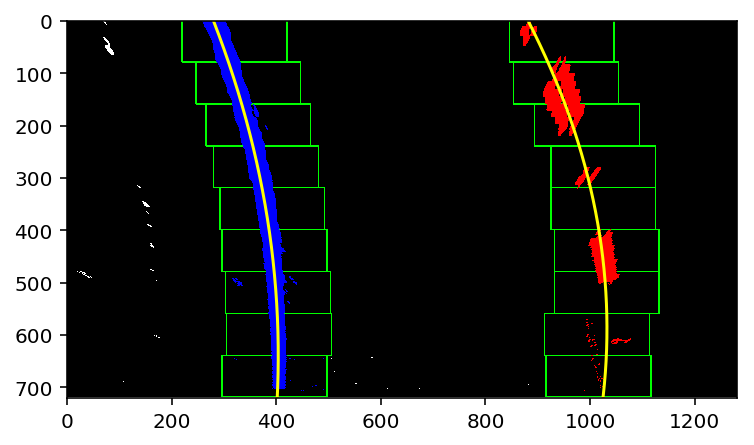

In [14]:
proc = process_image(image, mtx, dist, ksize)
rgb = cv2.cvtColor(proc, cv2.COLOR_BGR2RGB)

In [15]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


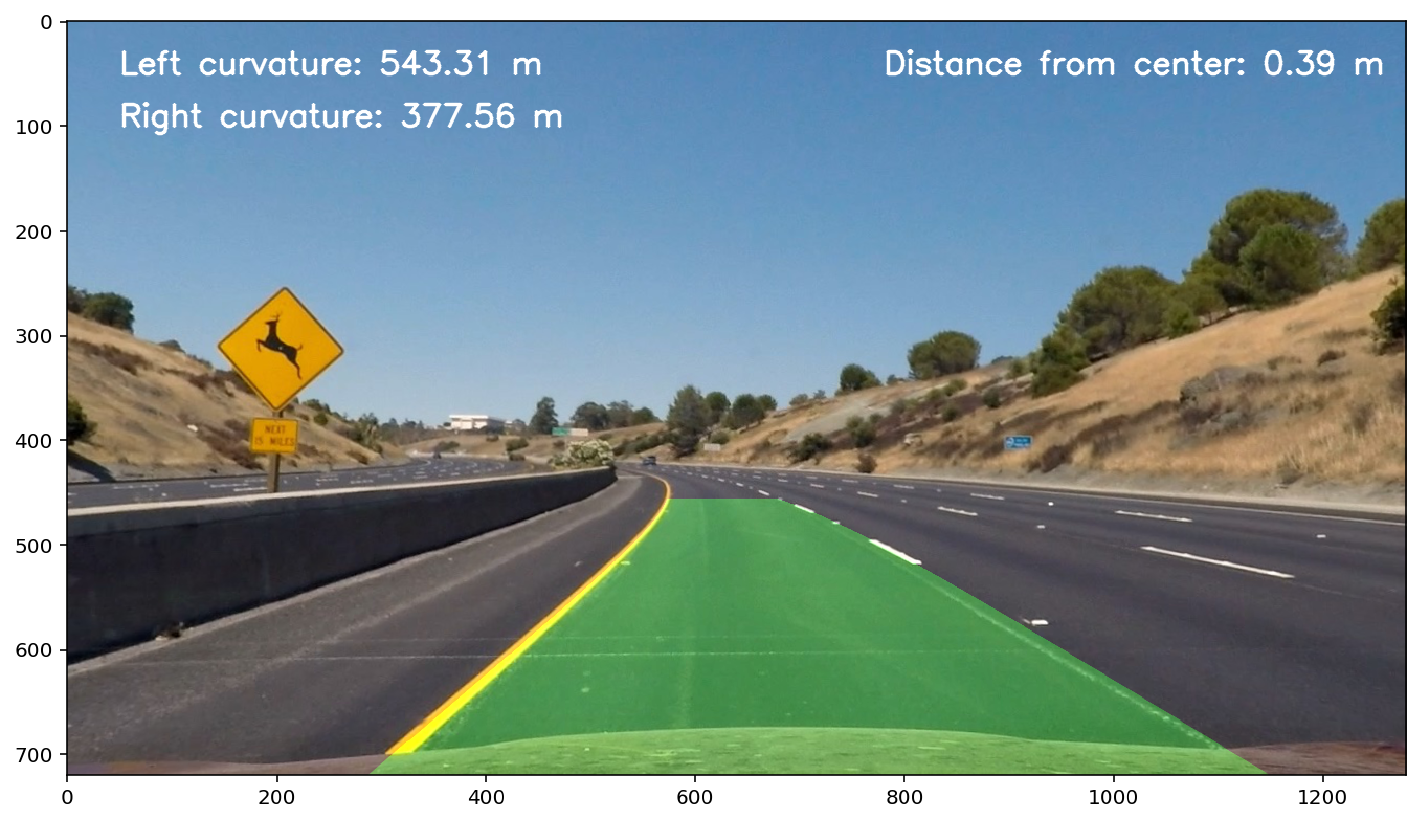

In [16]:
plt.imshow(rgb)

2. Apply a distortion correction to raw images.

In [17]:

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve

0
255
0
255
397.259605815 1049.6217647
723.44068526 640.0
[MoviePy] >>>> Building video out_test_video.mp4
[MoviePy] Writing video out_test_video.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

0
255
0
255


  0%|          | 1/1261 [00:00<05:32,  3.79it/s]

397.259605815 1049.6217647
723.44068526 640.0
0
255
0
255


  0%|          | 2/1261 [00:00<05:27,  3.84it/s]

396.675992372 1057.06051261
726.868252493 640.0
0
255
0
255


  0%|          | 3/1261 [00:00<05:18,  3.95it/s]

396.332732553 1061.88071918
729.106725866 640.0
0
255
0
255
397.987397625 1065.28290776
731.635152692 640.0


  0%|          | 4/1261 [00:01<05:44,  3.65it/s]

0
255
0
255

  0%|          | 5/1261 [00:01<05:57,  3.51it/s]


401.112333911 1065.86683231
733.489583112 640.0
0
255
0
255


  0%|          | 6/1261 [00:01<05:38,  3.70it/s]

403.296279872 1065.5540838
734.425181838 640.0
0
255
0
255


  1%|          | 7/1261 [00:01<05:42,  3.66it/s]

405.36859049 1066.09812668
735.733358583 640.0
0
255
0
255
407.70676129 1068.57585501
738.141308148 640.0


  1%|          | 8/1261 [00:02<06:09,  3.39it/s]

0
255
0
255
407.904610101 1076.49072954
742.197669819 640.0


  1%|          | 9/1261 [00:02<06:32,  3.19it/s]

0
255
0
255
407.173518269 1080.14200166
743.657759963 640.0


  1%|          | 10/1261 [00:02<06:39,  3.13it/s]

0
255
0
255
408.74019851 1066.1379149
737.439056706 640.0


  1%|          | 12/1261 [00:03<06:42,  3.10it/s]

0
255
0
255
406.505703566 1075.32490401
740.915303791 640.0
0
255
0
255


  1%|          | 13/1261 [00:04<07:52,  2.64it/s]

407.362018085 1059.69002796
733.526023025 640.0
0
255
0
255


  1%|          | 14/1261 [00:04<07:06,  2.92it/s]

408.05296621 1059.16629457
733.60963039 640.0
0
255
0
255


  1%|          | 15/1261 [00:04<06:37,  3.14it/s]

407.422733945 1062.93336925
735.178051598 640.0
0
255
0
255
407.933159492 1062.62664144
735.279900467 640.0


  1%|▏         | 16/1261 [00:05<07:05,  2.93it/s]

0
255
0
255


  1%|▏         | 17/1261 [00:05<07:48,  2.66it/s]

408.122974195 1060.19767564
734.160324917 640.0
0
255
0
255


  1%|▏         | 18/1261 [00:05<07:04,  2.93it/s]

408.028512304 1054.8675366
731.448024453 640.0
0
255
0
255


  2%|▏         | 19/1261 [00:05<06:18,  3.29it/s]

407.448992096 1055.01835278
731.23367244 640.0
0
255
0
255


  2%|▏         | 20/1261 [00:06<06:16,  3.30it/s]

406.384686038 1053.32655494
729.855620487 640.0
0
255
0
255


  2%|▏         | 21/1261 [00:06<06:22,  3.24it/s]

405.643775558 1045.90205899
725.772917271 640.0
0
255
0
255


  2%|▏         | 22/1261 [00:06<06:15,  3.30it/s]

402.604779202 1052.1059645
727.355371854 640.0
0
255
0
255


  2%|▏         | 23/1261 [00:07<06:02,  3.42it/s]

399.130737306 1052.46754233
725.799139818 640.0
0
255
0
255


  2%|▏         | 24/1261 [00:07<06:09,  3.35it/s]

396.572514859 1058.33013654
727.451325702 640.0
0
255
0
255


  2%|▏         | 25/1261 [00:07<06:32,  3.15it/s]

394.26132245 1044.0727453
719.167033874 640.0


  2%|▏         | 26/1261 [00:08<06:33,  3.14it/s]

0
255
0
255
391.504127791 1045.01167647
718.257902132 640.0
0
255
0
255
388.488507662 1043.52439545
716.006451553 640.0


  2%|▏         | 28/1261 [00:08<06:07,  3.36it/s]

0
255
0
255
386.226054655 1049.44307846
717.834566557 640.0


  2%|▏         | 29/1261 [00:08<05:34,  3.68it/s]

0
255
0
255
384.93981113 1053.25916748
719.099489306 640.0


  2%|▏         | 30/1261 [00:09<05:14,  3.91it/s]

0
255
0
255
384.495654752 1055.19746776
719.846561258 640.0


  2%|▏         | 31/1261 [00:09<05:19,  3.86it/s]

0
255
0
255
385.085233001 1057.21775478
721.151493892 640.0


  3%|▎         | 32/1261 [00:09<05:31,  3.70it/s]

0
255
0
255
384.707892986 1055.60283811
720.155365547 640.0


  3%|▎         | 33/1261 [00:09<05:23,  3.80it/s]

0
255
0
255
383.493569845 1055.22053257
719.357051207 640.0
0
255
0
255
384.610606149 1052.01314194
718.311874043 640.0


  3%|▎         | 35/1261 [00:10<05:45,  3.55it/s]

0
255
0
255
384.736108456 1067.82261473
726.279361595 640.0
0
255
0
255
386.740130305 1034.5956009
710.667865605 640.0


  3%|▎         | 37/1261 [00:11<05:38,  3.61it/s]

0
255
0
255
386.98804567 1035.39745857
711.192752118 640.0
0
255
0
255
388.034238542 1039.68896152
713.861600029 640.0


  3%|▎         | 38/1261 [00:11<06:53,  2.96it/s]

0
255
0
255
388.875450499 1048.43615072
718.65580061 640.0


  3%|▎         | 39/1261 [00:11<07:20,  2.78it/s]

0
255
0
255
389.418128611 1050.93867798
720.178403293 640.0


  3%|▎         | 40/1261 [00:12<07:26,  2.73it/s]

0
255
0
255
391.200238969 1052.95059774
722.075418356 640.0


  3%|▎         | 41/1261 [00:12<07:19,  2.78it/s]

0
255
0
255
392.741112199 1053.62197114
723.181541669 640.0


  3%|▎         | 42/1261 [00:13<07:17,  2.79it/s]

0
255
0
255
395.392646032 1054.52777299
724.960209513 640.0


  3%|▎         | 43/1261 [00:13<07:30,  2.70it/s]

0
255
0
255
395.961083701 1055.68762158
725.824352641 

  3%|▎         | 44/1261 [00:13<07:42,  2.63it/s]

640.0
0
255
0
255


  4%|▎         | 45/1261 [00:14<07:50,  2.59it/s]

397.794014831 1057.86089432
727.827454576 640.0
0
255
0
255
398.354258561 1053.83620274
726.095230652 640.0


  4%|▎         | 46/1261 [00:14<07:49,  2.59it/s]

0
255
0
255
397.828973172

  4%|▎         | 47/1261 [00:15<08:08,  2.49it/s]

 1051.21986448
724.524418825 640.0
0
255
0
255
399.408605168 1063.67429123
731.541448199 640.0


  4%|▍         | 49/1261 [00:15<07:45,  2.61it/s]

0
255
0
255
399.617391509 1058.97066866
729.294030082 640.0


  4%|▍         | 50/1261 [00:16<07:10,  2.81it/s]

0
255
0
255
401.436444975 1041.80538666
721.620915819 640.0


  4%|▍         | 51/1261 [00:16<06:25,  3.14it/s]

0
255
0
255
402.115574958 1042.46611261
722.290843784 640.0


  4%|▍         | 52/1261 [00:16<06:05,  3.31it/s]

0
255
0
255
402.050073212 1048.06015316
725.055113185 640.0
0
255
0
255
402.265826084 1051.22583912
726.745832602 640.0


  4%|▍         | 53/1261 [00:16<06:17,  3.20it/s]

0
255
0
255


  4%|▍         | 54/1261 [00:17<07:17,  2.76it/s]

402.264638607 1053.75053662
728.007587612 640.0
0
255
0
255


  4%|▍         | 55/1261 [00:17<06:37,  3.03it/s]

402.726933204 1055.34688898
729.03691109 640.0
0
255
0
255


  4%|▍         | 56/1261 [00:17<06:11,  3.25it/s]

402.049276297 1055.03543823
728.542357264 640.0
0
255
0
255


  5%|▍         | 57/1261 [00:18<06:03,  3.32it/s]

401.745073901 1055.46609762
728.605585758 640.0
0
255
0
255


  5%|▍         | 58/1261 [00:18<05:41,  3.52it/s]

399.875843147 1058.78788957
729.33186636 640.0
0
255
0
255


  5%|▍         | 59/1261 [00:18<05:24,  3.71it/s]

398.2383363 1073.95656173
736.097449017 640.0
0
255
0
255


  5%|▍         | 60/1261 [00:18<05:12,  3.84it/s]

396.726010166 1039.25690998
717.991460075 640.0
0
255
0
255


  5%|▍         | 61/1261 [00:19<05:07,  3.90it/s]

394.233796599 1039.22280266
716.728299632 640.0
0
255
0
255


  5%|▍         | 62/1261 [00:19<05:07,  3.90it/s]

392.676979339 1046.14969311
719.413336224 640.0
0
255
0
255


  5%|▍         | 63/1261 [00:19<05:13,  3.82it/s]

390.479797408 1045.13199916
717.805898285 640.0
0
255
0
255


  5%|▌         | 64/1261 [00:20<05:12,  3.83it/s]

389.041062678 1048.17460937
718.607836026 640.0
0
255
0
255


  5%|▌         | 65/1261 [00:20<05:09,  3.87it/s]

386.888360212 1047.09086457
716.989612391 640.0
0
255
0
255


  5%|▌         | 66/1261 [00:20<04:57,  4.02it/s]

386.55183835 1045.05524388
715.803541113 640.0
0
255
0
255


  5%|▌         | 67/1261 [00:20<04:54,  4.06it/s]

385.74402058 1041.1990675
713.471544042 640.0
0
255
0
255


  5%|▌         | 68/1261 [00:20<04:50,  4.11it/s]

386.110692827 1038.88100547
712.495849147 640.0
0
255
0
255


  5%|▌         | 69/1261 [00:21<04:49,  4.11it/s]

385.674789437 1038.0068291
711.84080927 640.0
0
255
0
255


  6%|▌         | 70/1261 [00:21<04:55,  4.03it/s]

385.067693807 1037.58641821
711.327056009 640.0
0
255
0
255


  6%|▌         | 71/1261 [00:21<05:05,  3.89it/s]

385.475025107 1028.10753069
706.791277898 640.0
0
255
0
255


  6%|▌         | 72/1261 [00:21<04:59,  3.96it/s]

385.747411781 1011.1045303
698.425971043 640.0
0
255
0
255


  6%|▌         | 73/1261 [00:22<04:55,  4.02it/s]

385.780752587 1003.43263731
694.606694947 640.0
0
255
0
255


  6%|▌         | 74/1261 [00:22<04:45,  4.15it/s]

385.855852212 1006.42003026
696.137941237 640.0
0
255
0
255


  6%|▌         | 75/1261 [00:22<04:46,  4.14it/s]

385.065002325 1011.54567553
698.30533893 640.0
0
255
0
255


  6%|▌         | 76/1261 [00:22<04:59,  3.96it/s]

384.872152527 1019.60086721
702.236509869 640.0
0
255
0
255


  6%|▌         | 77/1261 [00:23<05:08,  3.84it/s]

382.980529271 1020.22094933
701.600739302 640.0
0
255
0
255


  6%|▌         | 78/1261 [00:23<05:34,  3.54it/s]

382.475957313 1026.4307138
704.453335554 640.0
0
255
0
255


  6%|▋         | 79/1261 [00:23<05:57,  3.30it/s]

379.52494128 1029.05689538
704.290918331 640.0
0
255
0
255


  6%|▋         | 80/1261 [00:24<09:00,  2.18it/s]

377.283781269 1030.52121115
703.902496209 640.0
0
255
0
255
377.119917661 1031.54633276
704.333125209 640.0


  6%|▋         | 81/1261 [00:25<11:12,  1.75it/s]

0
255
0
255
373.534976289 1031.90745541
702.721215852 640.0

  7%|▋         | 82/1261 [00:25<10:15,  1.91it/s]


0
255
0
255
371.18562112 1034.39942581
702.792523465 640.0


  7%|▋         | 83/1261 [00:26<09:08,  2.15it/s]

0
255
0
255
367.766750285 1048.55265327
708.159701778 640.0


  7%|▋         | 84/1261 [00:26<08:22,  2.34it/s]

0
255
0
255
365.204988853 1046.81193652
706.008462685 640.0


  7%|▋         | 85/1261 [00:26<07:51,  2.49it/s]

0
255
0
255


  7%|▋         | 86/1261 [00:27<07:54,  2.48it/s]

363.191597686 1049.76035414
706.475975913 640.0
0
255
0
255
361.867507549 1022.64174499
692.254626271 640.0


  7%|▋         | 88/1261 [00:28<07:03,  2.77it/s]

0
255
0
255
360.486196387 1022.35390157
691.42004898 640.0
0
255
0
255
360.66900784 

  7%|▋         | 90/1261 [00:28<06:22,  3.06it/s]

1029.18697348
694.927990659 640.0
0
255
0
255
361.658915819 1031.30035219
696.479634007 640.0


  7%|▋         | 91/1261 [00:28<06:00,  3.25it/s]

0
255
0
255
361.831815322 1030.81459348
696.3232044 640.0


  7%|▋         | 92/1261 [00:29<05:43,  3.40it/s]

0
255
0
255
363.388588482 1031.13580962
697.262199052 640.0


  7%|▋         | 93/1261 [00:29<05:21,  3.63it/s]

0
255
0
255
365.417810868 1028.07617338
696.746992124 640.0
0
255
0
255
367.054942234 1027.32685168
697.190896957 640.0


  8%|▊         | 95/1261 [00:30<05:47,  3.35it/s]

0
255
0
255
367.379980025 1026.98391492
697.181947474 640.0


  8%|▊         | 96/1261 [00:30<05:32,  3.50it/s]

0
255
0
255
368.353303966 1026.16856275
697.26093336 640.0
0
255
0
255
369.925784589 1036.95829763
703.442041108 640.0


  8%|▊         | 97/1261 [00:30<05:39,  3.43it/s]

0
255
0
255
369.601074342 1022.39333762
695.997205983 640.0


  8%|▊         | 99/1261 [00:31<05:53,  3.29it/s]

0
255
0
255
370.972570805 1004.97332917
687.972949985 640.0
0
255
0
255
371.606052217 1007.45773648
689.53189435 640.0


  8%|▊         | 101/1261 [00:31<05:53,  3.28it/s]

0
255
0
255
372.337422226 1012.61501979
692.476221007 640.0


  8%|▊         | 102/1261 [00:32<05:38,  3.42it/s]

0
255
0
255
372.518108955 1018.00351969
695.260814321 640.0


  8%|▊         | 103/1261 [00:32<05:18,  3.63it/s]

0
255
0
255
372.969645007 1021.95157083
697.460607919 640.0


  8%|▊         | 104/1261 [00:32<05:07,  3.76it/s]

0
255
0
255
375.13947767 1024.03212005
699.58579886 640.0


  8%|▊         | 105/1261 [00:32<04:59,  3.87it/s]

0
255
0
255
374.686599633 1026.74397038
700.715285008 640.0


  8%|▊         | 106/1261 [00:33<04:56,  3.90it/s]

0
255
0
255
376.543192324 1030.30323096
703.423211643 640.0


  8%|▊         | 107/1261 [00:33<04:53,  3.93it/s]

0
255
0
255
376.381978199 1033.65897833
705.020478264 640.0


  9%|▊         | 108/1261 [00:33<05:06,  3.77it/s]

0
255
0
255
377.721506063 1031.23239021
704.476948136 640.0


  9%|▊         | 109/1261 [00:33<05:06,  3.76it/s]

0
255
0
255
378.048925535 1028.37984327
703.214384404 640.0


  9%|▊         | 110/1261 [00:34<04:50,  3.96it/s]

0
255
0
255
377.567104252 1032.62049777
705.093801013 640.0


  9%|▉         | 111/1261 [00:34<04:55,  3.89it/s]

0
255
0
255
378.241337822 1040.75587225
709.498605036 640.0


  9%|▉         | 112/1261 [00:34<04:51,  3.94it/s]

0
255
0
255
377.482984556 1041.30015814
709.391571346 640.0


  9%|▉         | 113/1261 [00:34<04:54,  3.90it/s]

0
255
0
255
378.030836376 1022.61911935
700.324977863 640.0


  9%|▉         | 114/1261 [00:35<05:08,  3.72it/s]

0
255
0
255
378.242839329 1022.36711893
700.30497913 640.0
0
255
0
255
379.414203677 1031.66442969
705.539316683 640.0


  9%|▉         | 115/1261 [00:35<05:30,  3.46it/s]

0
255
0
255


  9%|▉         | 116/1261 [00:36<07:17,  2.62it/s]

380.534669271 1035.76280084
708.148735057 640.0
0
255
0
255
381.606223158 1037.78233502
709.694279087 640.0


  9%|▉         | 117/1261 [00:36<07:19,  2.60it/s]

0
255
0
255
383.587917232 1039.46003019
711.523973709 640.0


  9%|▉         | 118/1261 [00:36<07:17,  2.61it/s]

0
255
0
255


  9%|▉         | 119/1261 [00:38<11:13,  1.69it/s]

384.698073019 1039.43093359
712.064503305 640.0
0
255
0
255


 10%|▉         | 120/1261 [00:38<10:59,  1.73it/s]

386.513830183 1038.04230785
712.278069019 640.0
0
255
0
255


 10%|▉         | 121/1261 [00:39<11:06,  1.71it/s]

388.084751331 1045.562205
716.823478164 640.0
0
255
0
255


 10%|▉         | 122/1261 [00:39<11:07,  1.71it/s]

389.841242509 1040.41897907
715.13011079 640.0
0
255
0
255


 10%|▉         | 123/1261 [00:40<11:14,  1.69it/s]

390.800878267 1021.60840229
706.204640281 640.0
0
255
0
255
391.839220079

 10%|▉         | 124/1261 [00:40<10:20,  1.83it/s]

 1027.39223092
709.615725501 640.0
0
255
0
255


 10%|▉         | 125/1261 [00:41<09:41,  1.95it/s]

393.609411448 1035.38984404
714.499627743 640.0
0

 10%|▉         | 126/1261 [00:41<09:09,  2.07it/s]


255
0
255
393.732451672 1036.36022414
715.046337907 640.0
0
255
0
255


 10%|█         | 127/1261 [00:42<09:01,  2.09it/s]

394.397403245 1046.42147247
720.409437856 640.0
0
255
0
255
395.64366563 1048.39561795
722.019641789 640.0


 10%|█         | 129/1261 [00:42<07:30,  2.51it/s]

0
255
0
255
397.820488467 1050.31713448
724.068811476 640.0


 10%|█         | 130/1261 [00:43<06:50,  2.76it/s]

0
255
0
255
398.766211782 1047.09130782
722.928759802 640.0
0
255
0
255


 10%|█         | 131/1261 [00:43<07:27,  2.53it/s]

401.549324059 1046.88295278
724.21613842 640.0
0
255
0
255


 10%|█         | 132/1261 [00:44<07:55,  2.37it/s]

403.281450118 1048.50443165
725.892940885 640.0
0
255
0
255


 11%|█         | 133/1261 [00:44<07:27,  2.52it/s]

403.761289183 1050.12424427
726.942766725 640.0
0
255


 11%|█         | 134/1261 [00:44<07:16,  2.58it/s]

0
255
404.734980065 1047.29834097
726.016660517 640.0
0
255
0
255
405.426349187 1032.45828686
718.942318023 640.0


 11%|█         | 136/1261 [00:45<06:19,  2.97it/s]

0
255
0
255
405.813348929 1036.44814641
721.13074767 640.0


 11%|█         | 137/1261 [00:45<05:58,  3.14it/s]

0
255
0
255
405.369428929 1042.29059011
723.830009521 640.0


 11%|█         | 138/1261 [00:45<05:28,  3.42it/s]

0
255
0
255
403.633137847 1047.65000177
725.641569809 640.0


 11%|█         | 139/1261 [00:46<05:14,  3.57it/s]

0
255
0
255
402.184872546 1051.61266554
726.898769041 640.0


 11%|█         | 140/1261 [00:46<04:57,  3.77it/s]

0
255
0
255
401.543971322 1055.39607379
728.470022557 640.0


 11%|█         | 141/1261 [00:46<04:49,  3.87it/s]

0
255
0
255
400.680365951 1058.37190024
729.526133093 640.0


 11%|█▏        | 142/1261 [00:46<04:41,  3.98it/s]

0
255
0
255
400.038507462 1059.0906799
729.564593679 640.0


 11%|█▏        | 143/1261 [00:47<04:38,  4.01it/s]

0
255
0
255
400.914548147 1058.00558299
729.460065568 640.0


 11%|█▏        | 144/1261 [00:47<04:27,  4.18it/s]

0
255
0
255
399.569065969 1055.01557055
727.292318259 640.0


 11%|█▏        | 145/1261 [00:47<04:52,  3.82it/s]

0
255
0
255
399.041567445 1055.04841945
727.044993446 640.0
0
255
0
255


 12%|█▏        | 146/1261 [00:48<06:18,  2.95it/s]

398.807821697 1056.42489964
727.61636067 640.0
0
255
0
255
398.939029986

 12%|█▏        | 147/1261 [00:48<06:42,  2.77it/s]

 1057.26063394
728.099831962 640.0
0
255
0
255
399.179456039 1023.11029089
711.144873465 640.0


 12%|█▏        | 148/1261 [00:48<06:27,  2.87it/s]

0
255
0
255


 12%|█▏        | 149/1261 [00:49<06:56,  2.67it/s]

398.58149803 1035.14544881
716.863473422 640.0
0
255
0
255


 12%|█▏        | 150/1261 [00:49<07:55,  2.34it/s]

398.72431306 1039.34778661
719.036049834 640.0
0
255
0
255
398.268517783 1043.49879953
720.883658659 640.0


 12%|█▏        | 151/1261 [00:50<07:33,  2.45it/s]

0
255
0
255


 12%|█▏        | 152/1261 [00:50<07:41,  2.41it/s]

397.993225908 1046.24339278
722.118309346 640.0
0
255
0
255
397.353415766 1050.99803683
724.175726297 640.0


 12%|█▏        | 154/1261 [00:51<07:16,  2.54it/s]

0
255
0
255
395.655045193 1052.15335874
723.904201965 640.0
0
255
0
255
394.953904048 1053.81636265
724.38513335 640.0


 12%|█▏        | 155/1261 [00:51<06:51,  2.69it/s]

0
255
0
255


 12%|█▏        | 156/1261 [00:52<07:34,  2.43it/s]

393.679256102 1053.31725422
723.49825516 640.0
0
255
0
255
392.353306151 1051.93250026
722.142903208 640.0


 12%|█▏        | 157/1261 [00:52<07:14,  2.54it/s]

0
255
0
255
391.454950221 1050.79740451
721.126177365 640.0


 13%|█▎        | 159/1261 [00:53<07:10,  2.56it/s]

0
255
0
255
389.092899908 1065.89154555
727.49222273 640.0
0
255
0
255


 13%|█▎        | 160/1261 [00:53<07:10,  2.56it/s]

387.190889958 1047.19017275
717.190531352 640.0
0
255


 13%|█▎        | 161/1261 [00:54<07:04,  2.59it/s]

0
255
386.402985208 1043.04841498
714.725700094 640.0


 13%|█▎        | 162/1261 [00:54<06:28,  2.83it/s]

0
255
0
255
385.36277852 1035.7491545
710.555966508 640.0


 13%|█▎        | 163/1261 [00:54<05:57,  3.07it/s]

0
255
0
255
383.958252126 1041.57941892
712.768835525 640.0


 13%|█▎        | 164/1261 [00:54<05:36,  3.26it/s]

0
255
0
255
383.857244959 1044.51091572
714.184080342 640.0
0
255
0
255


 13%|█▎        | 165/1261 [00:55<06:18,  2.90it/s]

384.849796166 1049.93133858
717.390567374 640.0
0
255
0
255


 13%|█▎        | 166/1261 [00:55<06:02,  3.02it/s]

383.69463173 1049.37229937
716.533465551 640.0
0
255


 13%|█▎        | 167/1261 [00:55<05:58,  3.05it/s]

0
255
383.605277418 1045.06955747
714.337417442 640.0


 13%|█▎        | 168/1261 [00:56<06:06,  2.99it/s]

0
255
0
255
386.074179419 1047.1745025
716.624340958 640.0


 13%|█▎        | 169/1261 [00:56<05:40,  3.21it/s]

0
255
0
255
386.055195414 1045.30741076
715.681303088 640.0


 13%|█▎        | 170/1261 [00:56<05:18,  3.42it/s]

0
255
0
255
384.632834071 1044.39992963
714.516381849 640.0
0
255
0
255
383.440194991 1019.59378597
701.516990481 640.0


 14%|█▎        | 172/1261 [00:57<05:42,  3.18it/s]

0
255
0
255
382.079826201 1017.14199451
699.610910356 640.0


 14%|█▎        | 173/1261 [00:57<05:29,  3.30it/s]

0
255
0
255
380.348551863 1003.09373336
691.721142613 640.0


 14%|█▍        | 174/1261 [00:57<05:04,  3.57it/s]

0
255
0
255
379.24574922 1002.9578103
691.101779761 640.0
0
255
0
255
377.202786244 1016.00392479
696.603355515 640.0


 14%|█▍        | 176/1261 [00:58<05:27,  3.32it/s]

0
255
0
255
376.00850412 1023.65775031
699.833127216 640.0


 14%|█▍        | 177/1261 [00:58<05:32,  3.26it/s]

0
255
0
255
375.18490422 1026.38779834
700.786351279 640.0
0
255
0
255


 14%|█▍        | 178/1261 [00:59<06:55,  2.61it/s]

373.799915096 1031.60801172
702.70396341 640.0
0
255
0
255
373.268835793

 14%|█▍        | 179/1261 [00:59<07:05,  2.55it/s]

 1036.19094065
704.729888223 640.0
0
255
0
255


 14%|█▍        | 180/1261 [01:00<07:39,  2.35it/s]

372.401165725 1040.82273295
706.611949338 640.0
0
255


 14%|█▍        | 181/1261 [01:00<06:37,  2.71it/s]

0
255
370.871401132 1040.40416478
705.637782958 640.0
0
255


 14%|█▍        | 182/1261 [01:00<05:50,  3.08it/s]

0
255
368.99030472 1043.36706567
706.178685194 640.0
0
255
0
255


 15%|█▍        | 184/1261 [01:01<06:02,  2.97it/s]

367.331349851 1049.85350269
708.592426272 640.0
0
255
0
255
366.271513368 1056.10633699
711.188925179 640.0


 15%|█▍        | 185/1261 [01:01<05:25,  3.30it/s]

0
255
0
255
364.766451303 1033.68152529
699.223988297 640.0


 15%|█▍        | 186/1261 [01:02<05:12,  3.44it/s]

0
255
0
255
365.300768848 1051.15039516
708.225582005 640.0


 15%|█▍        | 187/1261 [01:02<05:11,  3.45it/s]

0
255
0
255
367.141818792 1055.84425013
711.493034461 640.0


 15%|█▍        | 188/1261 [01:02<04:52,  3.67it/s]

0
255
0
255
369.548832307 1053.8355657
711.692199003 640.0


 15%|█▍        | 189/1261 [01:02<04:33,  3.92it/s]

0
255
0
255
372.097666574 1050.41150869
711.254587634 640.0


 15%|█▌        | 190/1261 [01:03<04:28,  3.99it/s]

0
255
0
255
374.202727797 1048.0077561
711.105241949 640.0


 15%|█▌        | 191/1261 [01:03<04:20,  4.11it/s]

0
255
0
255
378.336343517 1048.02084257
713.178593044 640.0


 15%|█▌        | 192/1261 [01:03<04:17,  4.16it/s]

0
255
0
255
381.699422186 1048.53260742
715.116014803 640.0


 15%|█▌        | 193/1261 [01:03<04:06,  4.33it/s]

0
255
0
255
385.416045366 1047.41626183
716.416153596 640.0


 15%|█▌        | 194/1261 [01:03<04:03,  4.38it/s]

0
255
0
255
388.148205216 1045.34220964
716.745207428 640.0


 15%|█▌        | 195/1261 [01:04<04:09,  4.28it/s]

0
255
0
255
388.585720621 1039.50870884
714.04721473 640.0


 16%|█▌        | 196/1261 [01:04<04:34,  3.88it/s]

0
255
0
255
388.702313864 1046.05067698
717.376495424 640.0


 16%|█▌        | 197/1261 [01:04<04:39,  3.80it/s]

0
255
0
255
387.679359515 1061.05872885
724.369044185 640.0


 16%|█▌        | 198/1261 [01:05<04:36,  3.84it/s]

0
255
0
255
384.761468778 1055.86215947
720.311814125 640.0


 16%|█▌        | 199/1261 [01:05<04:50,  3.65it/s]

0
255
0
255
383.295827928 1054.57477701
718.935302469 640.0


 16%|█▌        | 200/1261 [01:05<05:14,  3.37it/s]

0
255
0
255
382.323175165 1054.21189028
718.26753272 640.0
0
255
0
255
380.487472191 1052.70864165
716.598056919 640.0


 16%|█▌        | 202/1261 [01:06<05:16,  3.34it/s]

0
255
0
255
378.56968495 1043.16590355
710.867794252 640.0


 16%|█▌        | 203/1261 [01:06<05:01,  3.51it/s]

0
255
0
255
376.115802879 1046.11600666
711.115904771 640.0


 16%|█▌        | 204/1261 [01:06<04:55,  3.58it/s]

0
255
0
255
375.510863202 1049.03707786
712.273970532 640.0
0
255
0
255


 16%|█▋        | 205/1261 [01:07<05:46,  3.05it/s]

376.420463937 1049.05162935
712.736046645 640.0
0
255
0
255
376.86083546 1047.53270065
712.196768057 640.0


 16%|█▋        | 207/1261 [01:07<05:33,  3.16it/s]

0
255
0
255
377.095851296 1046.26256854
711.679209915 640.0


 16%|█▋        | 208/1261 [01:08<05:06,  3.44it/s]

0
255
0
255
377.729762751 1054.49531222
716.112537488 640.0
0
255
0
255
377.791225234 1048.02032043
712.905772831 640.0


 17%|█▋        | 210/1261 [01:08<04:55,  3.56it/s]

0
255
0
255
377.878344753 1045.12722291
711.50278383 640.0


 17%|█▋        | 211/1261 [01:08<04:44,  3.69it/s]

0
255
0
255
376.722565039 1049.9760192
713.349292122 640.0


 17%|█▋        | 212/1261 [01:09<04:37,  3.79it/s]

0
255
0
255
376.485828268 1036.77668324
706.631255754 640.0


 17%|█▋        | 213/1261 [01:09<04:34,  3.82it/s]

0
255
0
255
375.600352249 1038.19893233
706.899642288 640.0


 17%|█▋        | 214/1261 [01:09<04:35,  3.81it/s]

0
255
0
255
375.160868101 1043.38860224
709.274735169 640.0


 17%|█▋        | 215/1261 [01:09<04:24,  3.96it/s]

0
255
0
255
374.476079221 1045.7306286
710.103353913 640.0


 17%|█▋        | 216/1261 [01:10<04:18,  4.05it/s]

0
255
0
255
373.312005935 1046.22589912
709.768952528 640.0


 17%|█▋        | 217/1261 [01:10<04:16,  4.07it/s]

0
255
0
255
375.197756047 1044.74155101
709.969653526 640.0


 17%|█▋        | 218/1261 [01:10<04:22,  3.97it/s]

0
255
0
255
374.612745136 1044.45731201
709.535028572 640.0
0
255
0
255
375.951685654 1040.02510144
707.988393547 640.0


 17%|█▋        | 220/1261 [01:11<04:53,  3.55it/s]

0
255
0
255
375.918542221 1038.85762114
707.388081679 640.0


 18%|█▊        | 221/1261 [01:11<04:42,  3.68it/s]

0
255
0
255
377.226056818 1051.0313067
714.12868176 640.0


 18%|█▊        | 222/1261 [01:11<04:29,  3.86it/s]

0
255
0
255
377.007652693 1052.90789243
714.95777256 640.0


 18%|█▊        | 223/1261 [01:12<04:21,  3.97it/s]

0
255
0
255
377.147742363 1045.65696643
711.402354394 640.0


 18%|█▊        | 224/1261 [01:12<04:17,  4.03it/s]

0
255
0
255
377.831077834 1022.43656543
700.133821632 640.0


 18%|█▊        | 225/1261 [01:12<04:12,  4.11it/s]

0
255
0
255
376.416545044 1024.25344084
700.334992944 640.0


 18%|█▊        | 226/1261 [01:12<04:06,  4.20it/s]

0
255
0
255
375.728964042 1030.18075172
702.954857879 640.0


 18%|█▊        | 227/1261 [01:12<04:17,  4.01it/s]

0
255
0
255
375.027068584 1031.31460012
703.170834352 640.0


 18%|█▊        | 228/1261 [01:13<04:22,  3.93it/s]

0
255
0
255
374.070577914 1031.4918619
702.781219905 640.0


 18%|█▊        | 229/1261 [01:13<04:15,  4.04it/s]

0
255
0
255
374.257396611 1029.10355014
701.680473377 640.0


 18%|█▊        | 230/1261 [01:13<04:17,  4.00it/s]

0
255
0
255
372.222112449 1027.74629551
699.984203978 640.0


 18%|█▊        | 231/1261 [01:13<04:09,  4.12it/s]

0
255
0
255
371.54767068 1022.89700754
697.222339108 640.0


 18%|█▊        | 232/1261 [01:14<04:08,  4.14it/s]

0
255
0
255
369.703525438 1020.58310755
695.143316496 640.0


 18%|█▊        | 233/1261 [01:14<04:12,  4.07it/s]

0
255
0
255
367.590655365 1021.79903803
694.694846698 640.0
0
255
0
255
365.953648525 1022.26746464
694.11055658 640.0


 19%|█▊        | 234/1261 [01:14<04:41,  3.65it/s]

0
255
0
255
363.050839973 1003.01742769
683.03413383 640.0


 19%|█▊        | 235/1261 [01:15<05:15,  3.26it/s]

0
255
0
255
361.329708523 1000.37202798
680.850868252 640.0


 19%|█▊        | 236/1261 [01:15<05:33,  3.08it/s]

0
255
0
255
359.06209471

 19%|█▉        | 237/1261 [01:15<06:09,  2.77it/s]

 1002.66855609
680.865325402 640.0
0
255
0
255
357.698680404 1010.48357093
684.091125665 640.0


 19%|█▉        | 238/1261 [01:16<06:15,  2.72it/s]

0
255
0
255
356.409889503 1012.15475685
684.282323176 640.0


 19%|█▉        | 239/1261 [01:17<08:05,  2.10it/s]

0
255
0
255
354.721354999 1013.41706763
684.069211315 640.0


 19%|█▉        | 240/1261 [01:17<07:35,  2.24it/s]

0
255
0
255
355.812117652 1012.48181097
684.146964309 640.0


 19%|█▉        | 241/1261 [01:17<07:18,  2.33it/s]

0
255
0
255


 19%|█▉        | 243/1261 [01:18<06:27,  2.63it/s]

353.3425221 1014.61964435
683.981083224 640.0
0
255
0
255
352.93610454 1014.66488297
683.800493757 640.0


 19%|█▉        | 244/1261 [01:18<05:47,  2.92it/s]

0
255
0
255
352.184102239 1016.10024534
684.142173791 640.0


 19%|█▉        | 245/1261 [01:19<05:24,  3.13it/s]

0
255
0
255
350.964162835 1005.33324316
678.148702995 640.0


 20%|█▉        | 246/1261 [01:19<05:06,  3.31it/s]

0
255
0
255
349.483410515 995.599758434
672.541584475 640.0


 20%|█▉        | 247/1261 [01:19<04:56,  3.42it/s]

0
255
0
255
348.684005039 1000.01967223
674.351838633 640.0
0
255
0
255


 20%|█▉        | 248/1261 [01:20<05:48,  2.90it/s]

349.609049881 1011.95346999
680.781259937 640.0
0
255
0
255


 20%|█▉        | 249/1261 [01:20<05:35,  3.02it/s]

348.897345372 1010.75100061
679.824172991 640.0
0
255


 20%|█▉        | 250/1261 [01:20<05:40,  2.97it/s]

0
255
348.62181249 1014.19355199
681.407682239 640.0
0
255
0
255


 20%|█▉        | 251/1261 [01:21<05:54,  2.85it/s]

347.968298708 1014.17741833
681.07285852 640.0
0
255


 20%|█▉        | 252/1261 [01:21<05:43,  2.94it/s]

0
255
348.271458105 1012.80746113
680.53945962 640.0
0
255
0
255
349.162121355 1010.5061006
679.834110979 640.0


 20%|██        | 254/1261 [01:22<05:27,  3.07it/s]

0
255
0
255
349.228347056 1011.22652525
680.227436151 640.0
0
255
0
255
350.715361361 1011.59748127
681.156421316 640.0


 20%|██        | 256/1261 [01:22<05:36,  2.99it/s]

0
255
0
255
350.105000013 1010.2210792
680.163039605 640.0


 20%|██        | 257/1261 [01:22<05:14,  3.19it/s]

0
255
0
255
349.766156299 991.546279027
670.656217663 640.0


 20%|██        | 258/1261 [01:23<05:27,  3.06it/s]

0
255
0
255
349.901288266 977.974316621
663.937802443 640.0


 21%|██        | 259/1261 [01:23<05:04,  3.30it/s]

0
255
0
255
349.389045304 984.817338827
667.103192066 640.0


 21%|██        | 260/1261 [01:23<04:45,  3.50it/s]

0
255
0
255
350.909986681 1001.81290552
676.361446099 640.0


 21%|██        | 261/1261 [01:24<04:34,  3.65it/s]

0
255
0
255
351.379984685 1003.16058475
677.270284717 640.0


 21%|██        | 262/1261 [01:24<04:31,  3.67it/s]

0
255
0
255
352.471996833 1011.23990028
681.855948558 640.0


 21%|██        | 263/1261 [01:24<04:19,  3.84it/s]

0
255
0
255
351.795385544 1014.96656875
683.380977146 640.0


 21%|██        | 264/1261 [01:24<04:13,  3.93it/s]

0
255
0
255
351.021736326 1016.46333721
683.742536768 640.0


 21%|██        | 265/1261 [01:25<04:07,  4.02it/s]

0
255
0
255
351.704404025 1016.06206349
683.883233757 640.0


 21%|██        | 266/1261 [01:25<04:08,  4.01it/s]

0
255
0
255
350.800997017 1018.47674965
684.638873333 640.0


 21%|██        | 267/1261 [01:25<04:04,  4.07it/s]

0
255
0
255
351.338991855 1018.56722898
684.953110418 640.0


 21%|██▏       | 268/1261 [01:25<04:04,  4.06it/s]

0
255
0
255
350.652549019 1019.00128586
684.826917438 640.0
0
255
0
255
348.953235122 1021.02657262
684.989903872 640.0


 21%|██▏       | 269/1261 [01:26<04:32,  3.64it/s]

0
255
0
255
348.685126696 1027.62161213
688.153369415 640.0


 21%|██▏       | 270/1261 [01:26<04:56,  3.34it/s]

0
255
0
255
350.018062994 1010.93503269
680.476547842 640.0


 21%|██▏       | 271/1261 [01:26<05:11,  3.17it/s]

0
255
0
255


 22%|██▏       | 272/1261 [01:27<05:37,  2.93it/s]

351.564890043 1016.42944245
683.997166248 640.0
0
255
0
255


 22%|██▏       | 273/1261 [01:27<06:21,  2.59it/s]

353.113498072 1021.5433472
687.328422638 640.0
0
255
0
255
355.209084962 1028.31891436
691.763999662 640.0


 22%|██▏       | 275/1261 [01:28<05:51,  2.81it/s]

0
255
0
255
355.64588282 1028.15446216
691.900172492 640.0
0
255
0
255
356.93795804 1029.59049529
693.264226663 640.0


 22%|██▏       | 276/1261 [01:28<05:42,  2.87it/s]

0
255
0
255
358.877522557

 22%|██▏       | 277/1261 [01:29<05:53,  2.78it/s]

 1027.88873075
693.383126656 640.0
0
255
0
255
359.038026156 1027.63168098
693.334853568 640.0


 22%|██▏       | 278/1261 [01:29<05:58,  2.75it/s]

0
255
0
255


 22%|██▏       | 279/1261 [01:30<07:53,  2.07it/s]

360.975436672 1025.55428335
693.26486001 640.0
0
255
0
255
362.192782865 1026.65974254
694.426262703 640.0


 22%|██▏       | 280/1261 [01:30<07:18,  2.24it/s]

0
255
0
255
362.639254489 1017.08716976
689.863212124 640.0


 22%|██▏       | 282/1261 [01:31<06:25,  2.54it/s]

0
255
0
255
364.123117026 1008.3060513
686.214584162 640.0
0
255
0
255
364.289524889 1016.44943422
690.369479553

 22%|██▏       | 283/1261 [01:31<06:18,  2.58it/s]

 640.0
0
255
0
255
366.161788305 1019.11338398
692.637586142 640.0


 23%|██▎       | 284/1261 [01:32<06:10,  2.63it/s]

0
255
0
255
367.107806041 1024.4029439
695.755374968 640.0


 23%|██▎       | 285/1261 [01:32<06:07,  2.66it/s]

0
255
0
255


 23%|██▎       | 286/1261 [01:32<06:05,  2.67it/s]

367.023873594 1031.66146555
699.342669574 640.0
0
255
0
255


 23%|██▎       | 287/1261 [01:33<05:47,  2.81it/s]

368.297926641 1033.12299213
700.710459386 640.0
0
255


 23%|██▎       | 288/1261 [01:33<05:51,  2.77it/s]

0
255
367.772096085 1037.09808976
702.435092924 640.0


 23%|██▎       | 289/1261 [01:33<05:44,  2.83it/s]

0
255
0
255
371.847874211 1037.32084649
704.584360352 640.0
0
255
0
255
371.70908696 1037.94603084

 23%|██▎       | 290/1261 [01:34<05:48,  2.79it/s]


704.827558898 640.0
0
255
0
255
373.036941666 1036.09576861
704.56635514 640.0


 23%|██▎       | 291/1261 [01:34<05:47,  2.79it/s]

0
255
0
255
374.115054607 1036.74548458
705.430269594 640.0


 23%|██▎       | 292/1261 [01:34<05:46,  2.80it/s]

0
255
0
255
374.781068675 1021.8706524
698.325860539 640.0


 23%|██▎       | 294/1261 [01:35<05:29,  2.93it/s]

0
255
0
255
376.7250751 1014.73179366
695.728434379 640.0


 23%|██▎       | 295/1261 [01:35<05:00,  3.22it/s]

0
255
0
255
376.143739986 1019.14680156
697.645270775 640.0


 23%|██▎       | 296/1261 [01:36<04:47,  3.36it/s]

0
255
0
255
376.886528801 1027.91653556
702.401532182 640.0


 24%|██▎       | 297/1261 [01:36<04:36,  3.48it/s]

0
255
0
255
376.049892559 1035.29696798
705.673430268 640.0


 24%|██▎       | 298/1261 [01:36<04:22,  3.67it/s]

0
255
0
255
375.572676422 1039.30062042
707.43664842 640.0


 24%|██▎       | 299/1261 [01:36<04:07,  3.88it/s]

0
255
0
255
376.056508726 1039.99582759
708.026168156 640.0


 24%|██▍       | 300/1261 [01:37<04:01,  3.98it/s]

0
255
0
255
375.199222586 1041.96145657
708.580339577 640.0


 24%|██▍       | 301/1261 [01:37<03:58,  4.02it/s]

0
255
0
255
376.767592661 1042.48074197
709.624167317 640.0


 24%|██▍       | 302/1261 [01:37<04:00,  3.98it/s]

0
255
0
255
376.467906038 1043.58739839
710.027652215 640.0


 24%|██▍       | 303/1261 [01:37<03:57,  4.04it/s]

0
255
0
255
375.69202946 1043.84795085
709.769990153 640.0


 24%|██▍       | 304/1261 [01:38<04:18,  3.70it/s]

0
255
0
255
375.07700991 1043.6041929
709.340601405 640.0


 24%|██▍       | 305/1261 [01:38<04:17,  3.71it/s]

0
255
0
255
374.58546817 1071.33807686
722.961772516 640.0


 24%|██▍       | 306/1261 [01:38<04:08,  3.85it/s]

0
255
0
255
376.191240836 1056.14706874
716.169154789 640.0


 24%|██▍       | 307/1261 [01:38<04:02,  3.94it/s]

0
255
0
255
375.126428398 1050.66276915
712.894598773 640.0


 24%|██▍       | 308/1261 [01:39<04:00,  3.96it/s]

0
255
0
255
376.231301929 1047.17694058
711.704121257 640.0


 25%|██▍       | 309/1261 [01:39<03:54,  4.05it/s]

0
255
0
255
377.260811152 1047.18498336
712.222897254 640.0


 25%|██▍       | 310/1261 [01:39<03:52,  4.09it/s]

0
255
0
255
378.662766524 1049.96314407
714.312955298 640.0


 25%|██▍       | 311/1261 [01:39<03:47,  4.17it/s]

0
255
0
255
380.35682522 1049.32778457
714.842304897 640.0


 25%|██▍       | 312/1261 [01:40<03:46,  4.18it/s]

0
255
0
255
381.481638038 1046.60003333
714.040835683 640.0


 25%|██▍       | 313/1261 [01:40<03:45,  4.20it/s]

0
255
0
255
383.011886699 1041.21937
712.115628349 640.0


 25%|██▍       | 314/1261 [01:40<03:48,  4.15it/s]

0
255
0
255
384.94692032 1040.45796074
712.70244053 640.0


 25%|██▍       | 315/1261 [01:40<03:56,  4.01it/s]

0
255
0
255
385.227550388 1037.86969932
711.548624855 640.0


 25%|██▌       | 316/1261 [01:41<03:55,  4.01it/s]

0
255
0
255
385.230619102 1037.37911853
711.304868813 640.0


 25%|██▌       | 317/1261 [01:41<03:50,  4.10it/s]

0
255
0
255
384.994122298 1018.91537278
701.954747538 640.0


 25%|██▌       | 318/1261 [01:41<03:46,  4.16it/s]

0
255
0
255
386.59340717 1013.7384566
700.165931886 640.0


 25%|██▌       | 319/1261 [01:41<03:50,  4.09it/s]

0
255
0
255
386.772477778 1019.92196985
703.347223815 640.0


 25%|██▌       | 320/1261 [01:42<04:09,  3.77it/s]

0
255
0
255
388.006483776 1028.99147937
708.498981571 640.0


 25%|██▌       | 321/1261 [01:42<04:12,  3.73it/s]

0
255
0
255
388.741456366 1033.05602094
710.898738655 640.0


 26%|██▌       | 322/1261 [01:42<04:15,  3.68it/s]

0
255
0
255
388.180232068 1035.96686433
712.073548197 640.0


 26%|██▌       | 323/1261 [01:42<04:14,  3.68it/s]

0
255
0
255
388.910537724 1033.93006292
711.420300322 640.0


 26%|██▌       | 324/1261 [01:43<04:07,  3.79it/s]

0
255
0
255
386.742641271 1035.27939178
711.011016525 640.0


 26%|██▌       | 325/1261 [01:43<03:59,  3.91it/s]

0
255
0
255
387.154898049 1035.5524577
711.353677875 640.0


 26%|██▌       | 326/1261 [01:43<04:08,  3.77it/s]

0
255
0
255
387.103874897 1035.18206998
711.142972439 640.0


 26%|██▌       | 327/1261 [01:43<04:01,  3.86it/s]

0
255
0
255
385.896858399 1037.65465936
711.77575888 640.0


 26%|██▌       | 328/1261 [01:44<03:56,  3.95it/s]

0
255
0
255
384.930455929 1039.92923696
712.429846444 640.0


 26%|██▌       | 329/1261 [01:44<03:51,  4.03it/s]

0
255
0
255
382.324555325 1052.63604502
717.480300174 640.0


 26%|██▌       | 330/1261 [01:44<03:56,  3.94it/s]

0
255
0
255
382.172503276 1043.49650448
712.834503879 640.0


 26%|██▌       | 331/1261 [01:44<03:54,  3.97it/s]

0
255
0
255
380.526301481 1033.5364537
707.03137759 640.0


 26%|██▋       | 332/1261 [01:45<03:50,  4.03it/s]

0
255
0
255
382.24853603 1043.95312104
713.100828533 640.0


 26%|██▋       | 333/1261 [01:45<03:53,  3.98it/s]

0
255
0
255
381.363031574 1047.00953936
714.186285468 640.0


 26%|██▋       | 334/1261 [01:45<03:47,  4.08it/s]

0
255
0
255
381.682291576 1046.28742383
713.984857701 640.0


 27%|██▋       | 335/1261 [01:45<03:46,  4.09it/s]

0
255
0
255
382.124773878 1044.24796372
713.186368799 640.0


 27%|██▋       | 336/1261 [01:46<03:42,  4.16it/s]

0
255
0
255
381.525551016 1046.16746641
713.846508712 640.0


 27%|██▋       | 337/1261 [01:46<03:49,  4.03it/s]

0
255
0
255
381.618858009 1047.24665078
714.432754397 640.0


 27%|██▋       | 338/1261 [01:46<03:44,  4.12it/s]

0
255
0
255
384.524129554 1045.32801975
714.926074651 640.0


 27%|██▋       | 339/1261 [01:46<03:44,  4.10it/s]

0
255
0
255
384.803012909 1044.84520994
714.824111423 640.0


 27%|██▋       | 340/1261 [01:47<03:40,  4.18it/s]

0
255
0
255
386.625754694 1043.14620154
714.885978117 640.0


 27%|██▋       | 341/1261 [01:47<03:42,  4.14it/s]

0
255
0
255
386.834694122 1040.92578785
713.880240988 640.0


 27%|██▋       | 342/1261 [01:47<03:39,  4.18it/s]

0
255
0
255
388.101206547 1029.33558611
708.718396327 640.0


 27%|██▋       | 343/1261 [01:47<03:42,  4.14it/s]

0
255
0
255
386.83303988 1032.42074446
709.626892172 640.0


 27%|██▋       | 344/1261 [01:48<03:39,  4.17it/s]

0
255
0
255
386.870124149 1033.54910866
710.209616407 640.0


 27%|██▋       | 345/1261 [01:48<03:40,  4.15it/s]

0
255
0
255
387.188461343 1036.05088726
711.6196743 640.0


 27%|██▋       | 346/1261 [01:48<03:36,  4.24it/s]

0
255
0
255
386.035388409 1038.68391817
712.35965329 640.0


 28%|██▊       | 347/1261 [01:48<03:40,  4.14it/s]

0
255
0
255
385.880969419 1043.26353036
714.572249889 640.0
0
255
0
255
385.39395411 1044.36496923
714.879461672 640.0


 28%|██▊       | 349/1261 [01:49<04:10,  3.64it/s]

0
255
0
255
383.677721502 1044.40121059
714.039466045 640.0


 28%|██▊       | 350/1261 [01:49<04:07,  3.68it/s]

0
255
0
255
384.330755766 1043.79643426
714.063595013 640.0


 28%|██▊       | 351/1261 [01:49<04:12,  3.60it/s]

0
255
0
255
382.539241201 1043.88722431
713.213232753 640.0


 28%|██▊       | 352/1261 [01:50<04:00,  3.77it/s]

0
255
0
255
381.658955272 1043.38942081
712.52418804 640.0


 28%|██▊       | 353/1261 [01:50<03:56,  3.84it/s]

0
255
0
255
379.760975789 1041.00292671
710.381951251 640.0


 28%|██▊       | 354/1261 [01:50<03:51,  3.91it/s]

0
255
0
255
380.055230892 1039.35660817
709.705919532 640.0


 28%|██▊       | 355/1261 [01:50<03:45,  4.01it/s]

0
255
0
255
379.262348638 1036.17073854
707.716543591 640.0


 28%|██▊       | 356/1261 [01:51<03:45,  4.01it/s]

0
255
0
255
378.953517812 1026.93678704
702.945152427 640.0


 28%|██▊       | 357/1261 [01:51<03:43,  4.04it/s]

0
255
0
255
382.14859758 1033.70989987
707.929248723 640.0


 28%|██▊       | 358/1261 [01:51<03:40,  4.10it/s]

0
255
0
255
383.378835756 1036.14417656
709.761506158 640.0


 28%|██▊       | 359/1261 [01:51<03:56,  3.81it/s]

0
255
0
255
387.592348758 1041.78017492
714.686261841 640.0
0
255
0
255
388.549192201 1042.16350173
715.356346966 640.0


 29%|██▊       | 360/1261 [01:52<04:18,  3.48it/s]

0
255
0
255


 29%|██▊       | 361/1261 [01:52<04:52,  3.07it/s]

390.243105599 1042.42607477
716.334590184 640.0


 29%|██▊       | 362/1261 [01:53<04:49,  3.10it/s]

0
255
0
255
395.351854631 1039.67032143
717.51108803 640.0


 29%|██▉       | 363/1261 [01:53<04:37,  3.23it/s]

0
255
0
255
397.643108733 1040.69964556
719.171377144 640.0


 29%|██▉       | 364/1261 [01:53<04:39,  3.21it/s]

0
255
0
255
399.932786846 1035.61876479
717.77577582 640.0
0
255
0
255


 29%|██▉       | 365/1261 [01:53<04:53,  3.05it/s]

399.67085041 1028.32591073
713.998380571 640.0
0
255
0
255
399.867948278 1030.49672959
715.182338935 640.0


 29%|██▉       | 366/1261 [01:54<05:18,  2.81it/s]

0
255
0
255


 29%|██▉       | 367/1261 [01:54<06:10,  2.41it/s]

398.552848488 1032.04684379
715.299846141 640.0
0
255
0
255


 29%|██▉       | 368/1261 [01:55<07:20,  2.03it/s]

397.443459666 1037.33292492
717.388192291 640.0
0
255
0
255
395.789377373 1043.48522002
719.637298696 640.0


 29%|██▉       | 369/1261 [01:56<10:07,  1.47it/s]

0
255
0
255


 29%|██▉       | 370/1261 [01:57<08:44,  1.70it/s]

392.896297399 1044.47167823
718.683987815 640.0
0
255
0
255
389.715367835 1046.28783197
718.001599904 640.0


 30%|██▉       | 372/1261 [01:57<06:58,  2.13it/s]

0
255
0
255
386.950882287 1045.95647739
716.453679837 640.0


 30%|██▉       | 373/1261 [01:58<06:09,  2.41it/s]

0
255
0
255
383.652535077 1044.30975144
713.98114326 640.0
0
255
0
255
381.470249783 1041.21316562
711.341707699 640.0


 30%|██▉       | 374/1261 [01:58<05:52,  2.52it/s]

0
255
0
255
378.663046167 1040.16754709
709.415296628 640.0


 30%|██▉       | 375/1261 [01:58<05:42,  2.59it/s]

0
255
0
255
377.165619022 1035.43631506
706.300967042 640.0


 30%|██▉       | 376/1261 [01:59<05:23,  2.74it/s]

0
255
0
255
375.124730401

 30%|██▉       | 378/1261 [01:59<05:21,  2.75it/s]

 1028.87456676
701.99964858 640.0
0
255
0
255
374.497783432 1025.44818488
699.972984156 640.0
0
255
0
255
372.921382072 1030.66830627
701.794844173 640.0


 30%|███       | 380/1261 [02:00<04:58,  2.95it/s]

0
255
0
255
372.339464353 1030.09514532
701.217304836 640.0
0
255
0
255
373.381464278 1036.62381601
705.002640144 640.0


 30%|███       | 382/1261 [02:01<04:52,  3.01it/s]

0
255
0
255
373.568436171 1035.83566243
704.702049301 640.0


 30%|███       | 383/1261 [02:01<04:40,  3.12it/s]

0
255
0
255
374.741524509 1041.15089242
707.946208466 640.0


 30%|███       | 384/1261 [02:01<04:36,  3.17it/s]

0
255
0
255
375.220686413 1041.54567552
708.383180967 640.0
0
255
0
255
376.848359847 1041.66323974
709.255799794 640.0


 31%|███       | 386/1261 [02:02<04:32,  3.21it/s]

0
255
0
255
377.965082562 1041.46027675
709.712679654 640.0


 31%|███       | 387/1261 [02:02<04:24,  3.31it/s]

0
255
0
255
379.380748519 1042.12306144
710.751904981 640.0
0
255
0
255
380.690771656 1039.44836549
710.069568575 640.0


 31%|███       | 388/1261 [02:03<04:35,  3.17it/s]

0
255
0
255
380.833211536 1042.23162746
711.532419499 640.0


 31%|███       | 389/1261 [02:03<04:56,  2.94it/s]

0
255
0
255
380.298082605 1039.04803512
709.673058863 640.0


 31%|███       | 391/1261 [02:04<04:43,  3.07it/s]

0
255
0
255
379.704518757 1042.21123254
710.957875649 640.0


 31%|███       | 392/1261 [02:04<04:34,  3.16it/s]

0
255
0
255
379.531463198 1042.55862767
711.045045433 640.0


 31%|███       | 393/1261 [02:04<04:31,  3.20it/s]

0
255
0
255
379.766861327 1031.75704994
705.761955636 640.0


 31%|███       | 394/1261 [02:04<04:24,  3.27it/s]

0
255
0
255
378.499152019 1031.85287007
705.176011045 640.0


 31%|███▏      | 395/1261 [02:05<04:20,  3.32it/s]

0
255
0
255
378.812641406 1035.02727309
706.919957248 640.0


 31%|███▏      | 396/1261 [02:05<04:18,  3.35it/s]

0
255
0
255
378.230298655 1035.86341065
707.046854652 640.0


 31%|███▏      | 397/1261 [02:05<04:18,  3.34it/s]

0
255
0
255
376.891836486 1036.41648007
706.654158276 640.0


 32%|███▏      | 398/1261 [02:06<04:22,  3.29it/s]

0
255
0
255
376.378634842 1037.66521222
707.02192353 640.0


 32%|███▏      | 399/1261 [02:06<04:21,  3.29it/s]

0
255
0
255
375.432708097 1038.13586924
706.784288669 640.0
0
255
0
255
375.306689106 1039.40107139
707.35388025 640.0


 32%|███▏      | 401/1261 [02:07<04:27,  3.22it/s]

0
255
0
255
374.739999643 1046.64027365
710.690136646 640.0


 32%|███▏      | 402/1261 [02:07<04:21,  3.29it/s]

0
255
0
255
373.734744505 1046.70955714
710.222150825 640.0


 32%|███▏      | 403/1261 [02:07<04:17,  3.33it/s]

0
255
0
255
375.453773376 1036.10582144
705.779797408 640.0
0
255
0
255


 32%|███▏      | 404/1261 [02:08<05:03,  2.83it/s]

375.273893286 1038.20588751
706.739890397 640.0
0
255
0
255


 32%|███▏      | 405/1261 [02:08<05:26,  2.62it/s]

375.245478917 1030.73119492
702.988336918 640.0
0
255
0
255


 32%|███▏      | 406/1261 [02:08<05:07,  2.78it/s]

375.395014383 1027.03500116
701.21500777 640.0
0
255
0
255


 32%|███▏      | 407/1261 [02:09<05:28,  2.60it/s]

373.652660073 1024.84805734
699.250358707 640.0
0
255
0
255


 32%|███▏      | 408/1261 [02:09<05:15,  2.71it/s]

372.566048917 1024.04773996
698.306894437 640.0
0
255
0
255


 32%|███▏      | 409/1261 [02:09<04:48,  2.96it/s]

371.455588387 1026.47650588
698.966047132 640.0
0
255
0
255


 33%|███▎      | 410/1261 [02:10<04:32,  3.12it/s]

372.0382768 1027.31967959
699.678978195 640.0
0
255
0
255
370.089163 1027.87822794
698.983695471 640.0


 33%|███▎      | 412/1261 [02:10<04:36,  3.07it/s]

0
255
0
255
369.279032898 1029.52581943
699.402426164 640.0
0
255
0
255
367.717604011 1036.71586711
702.216735561 640.0


 33%|███▎      | 414/1261 [02:11<04:27,  3.16it/s]

0
255
0
255
366.182793792 1031.65796855
698.920381172 640.0


 33%|███▎      | 415/1261 [02:11<04:25,  3.19it/s]

0
255
0
255
363.802907319 1029.64735694
696.725132127 640.0


 33%|███▎      | 416/1261 [02:12<04:11,  3.36it/s]

0
255
0
255
362.146393342 1030.12218775
696.134290548 640.0


 33%|███▎      | 417/1261 [02:12<04:08,  3.39it/s]

0
255
0
255
360.540123756 1024.10656393
692.323343844 640.0


 33%|███▎      | 418/1261 [02:12<04:05,  3.43it/s]

0
255
0
255
359.149992741 1019.24948756
689.199740152 640.0


 33%|███▎      | 419/1261 [02:12<04:01,  3.49it/s]

0
255
0
255
359.682101916 1018.83170407
689.256902992 640.0


 33%|███▎      | 420/1261 [02:13<03:43,  3.76it/s]

0
255
0
255
360.265859618 1020.54590725
690.405883433 640.0


 33%|███▎      | 421/1261 [02:13<03:41,  3.79it/s]

0
255
0
255
360.446982743 1021.47211302
690.959547879 640.0


 33%|███▎      | 422/1261 [02:13<03:50,  3.64it/s]

0
255
0
255
362.880216302 1021.88614145
692.383178874 640.0
0
255
0
255
360.955996405 1020.44835727
690.70217684 640.0


 34%|███▎      | 424/1261 [02:14<04:08,  3.37it/s]

0
255
0
255
360.434821671 1021.32294981
690.87888574 640.0


 34%|███▎      | 425/1261 [02:14<04:08,  3.37it/s]

0
255
0
255
360.941030172 1020.49603478
690.718532478 640.0


 34%|███▍      | 426/1261 [02:14<04:02,  3.45it/s]

0
255
0
255
359.175526195 1022.51529662
690.845411405 640.0


 34%|███▍      | 427/1261 [02:15<03:52,  3.59it/s]

0
255
0
255
358.782126376 1018.7086895
688.74540794 640.0


 34%|███▍      | 428/1261 [02:15<03:48,  3.65it/s]

0
255
0
255
358.79161787 1022.04656557
690.419091719 640.0


 34%|███▍      | 429/1261 [02:15<03:46,  3.68it/s]

0
255
0
255
357.997004718 1007.0239701
682.510487409 640.0
0
255
0
255


 34%|███▍      | 430/1261 [02:16<04:44,  2.92it/s]

358.066601124 1002.12428266
680.09544189 640.0
0
255
0
255


 34%|███▍      | 431/1261 [02:16<04:20,  3.18it/s]

356.779068056 1006.12605501
681.452561533 640.0
0
255
0
255


 34%|███▍      | 432/1261 [02:16<03:55,  3.52it/s]

356.610974726 1008.62071121
682.615842968 640.0
0
255
0
255


 34%|███▍      | 433/1261 [02:16<03:51,  3.58it/s]

355.135632939 1009.8740465
682.50483972 640.0
0
255
0
255


 34%|███▍      | 434/1261 [02:17<03:49,  3.60it/s]

356.352536746 1011.60120355
683.976870147 640.0
0
255
0
255


 34%|███▍      | 435/1261 [02:17<03:44,  3.68it/s]

356.432986687 1012.70677882
684.569882754 640.0
0
255
0
255


 35%|███▍      | 436/1261 [02:17<03:35,  3.82it/s]

355.967091781 1012.52041573
684.243753755 640.0
0
255
0
255


 35%|███▍      | 437/1261 [02:17<03:29,  3.93it/s]

357.592785833 1012.33403448
684.963410157 640.0
0
255
0
255


 35%|███▍      | 438/1261 [02:18<03:44,  3.66it/s]

355.082427202 1008.42206408
681.75224564 640.0
0
255
0
255


 35%|███▍      | 439/1261 [02:18<03:54,  3.50it/s]

356.243005557 1000.79186286
678.51743421 640.0
0
255
0
255


 35%|███▍      | 440/1261 [02:18<03:45,  3.64it/s]

355.827425873 997.964747273
676.896086573 640.0
0
255
0
255


 35%|███▍      | 441/1261 [02:19<03:38,  3.75it/s]

354.893368306 1000.68256985
677.78796908 640.0
0
255
0
255


 35%|███▌      | 442/1261 [02:19<03:37,  3.77it/s]

353.918234053 1002.5963779
678.257305976 640.0
0
255
0
255


 35%|███▌      | 443/1261 [02:19<03:31,  3.86it/s]

350.473094601 1002.85956705
676.666330827 640.0
0
255
0
255


 35%|███▌      | 444/1261 [02:19<03:27,  3.94it/s]

348.880289621 1006.32363461
677.601962116 640.0
0
255
0
255


 35%|███▌      | 445/1261 [02:20<03:23,  4.01it/s]

347.008845886 1008.64693933
677.827892607 640.0
0
255
0
255


 35%|███▌      | 446/1261 [02:20<03:21,  4.04it/s]

346.634412418 1010.02736106
678.33088674 640.0
0
255
0
255


 35%|███▌      | 447/1261 [02:20<03:22,  4.02it/s]

346.545130677 1007.95554654
677.25033861 640.0
0
255
0
255


 36%|███▌      | 448/1261 [02:20<03:18,  4.10it/s]

344.62993183 1007.33055682
675.980244323 640.0
0
255
0
255


 36%|███▌      | 449/1261 [02:21<03:20,  4.05it/s]

343.693403324 1011.79284684
677.743125084 640.0
0
255
0
255


 36%|███▌      | 450/1261 [02:21<03:43,  3.63it/s]

341.925412532 1004.57924928
673.252330906 640.0
0
255


 36%|███▌      | 451/1261 [02:21<04:02,  3.35it/s]

0
255
340.238279184 1000.20554397
670.221911579 640.0
0
255
0
255
339.655788966

 36%|███▌      | 452/1261 [02:22<04:19,  3.11it/s]

 999.291601659
669.473695312 640.0
0
255
0
255
338.05584967 1001.92648657
669.991168122 640.0


 36%|███▌      | 453/1261 [02:22<04:28,  3.01it/s]

0
255
0
255
339.717356451 1007.27114585
673.494251153 

 36%|███▌      | 454/1261 [02:22<04:52,  2.76it/s]

640.0
0
255
0
255
338.88030975 1008.9130187
673.896664226 640.0


 36%|███▌      | 455/1261 [02:23<04:51,  2.76it/s]

0
255
0
255
339.079614513

 36%|███▌      | 456/1261 [02:23<04:54,  2.74it/s]

 1011.42166684
675.250640677 640.0
0
255
0
255


 36%|███▌      | 457/1261 [02:24<04:59,  2.69it/s]

340.817591811 1010.88606439
675.8518281 640.0
0
255
0
255
341.921508406

 36%|███▋      | 458/1261 [02:24<04:57,  2.70it/s]

 1012.1156845
677.018596454 640.0
0
255
0
255
342.442093312

 36%|███▋      | 459/1261 [02:24<04:57,  2.70it/s]

 1010.35570409
676.398898699 640.0
0
255
0
255
341.954755303 1009.80810984
675.881432571 640.0


 36%|███▋      | 460/1261 [02:25<04:56,  2.70it/s]

0
255
0
255
342.451137116 1027.30313831
684.877137711 640.0


 37%|███▋      | 461/1261 [02:25<04:50,  2.75it/s]

0
255
0
255
340.781122288

 37%|███▋      | 462/1261 [02:25<04:57,  2.69it/s]

 1023.67917626
682.230149272 640.0
0
255
0
255
339.808597362 1022.54565426
681.177125809 640.0


 37%|███▋      | 464/1261 [02:26<04:35,  2.89it/s]

0
255
0
255
341.135101426 1012.63147472
676.883288071 640.0


 37%|███▋      | 465/1261 [02:26<04:19,  3.06it/s]

0
255
0
255
341.280493815 1010.73349088
676.006992346 640.0


 37%|███▋      | 466/1261 [02:27<03:59,  3.32it/s]

0
255
0
255
343.153927362 1014.73363785
678.943782605 640.0


 37%|███▋      | 467/1261 [02:27<03:57,  3.35it/s]

0
255
0
255
344.865537735 1013.52138823
679.193462985 640.0


 37%|███▋      | 468/1261 [02:27<03:46,  3.50it/s]

0
255
0
255
345.889551036 1013.86288508
679.876218058 640.0


 37%|███▋      | 469/1261 [02:27<03:35,  3.68it/s]

0
255
0
255
348.185496747 1012.97872516
680.582110955 640.0


 37%|███▋      | 470/1261 [02:28<03:33,  3.70it/s]

0
255
0
255
348.244006761 1012.95930213
680.601654447 640.0


 37%|███▋      | 471/1261 [02:28<03:35,  3.66it/s]

0
255
0
255
350.797708374 1012.39194838
681.594828377 640.0


 37%|███▋      | 472/1261 [02:28<03:34,  3.68it/s]

0
255
0
255
351.161043317 1012.11600522
681.638524268 640.0


 38%|███▊      | 473/1261 [02:28<03:27,  3.79it/s]

0
255
0
255
352.779221951 997.116922901
674.948072426 640.0


 38%|███▊      | 474/1261 [02:29<03:23,  3.86it/s]

0
255
0
255
354.926457756 1008.01281614
681.46963695 640.0


 38%|███▊      | 475/1261 [02:29<03:16,  4.00it/s]

0
255
0
255
353.741772802 1004.52312171
679.132447254 640.0


 38%|███▊      | 476/1261 [02:29<03:14,  4.03it/s]

0
255
0
255
355.490217118 1004.00006588
679.745141501 640.0


 38%|███▊      | 477/1261 [02:29<03:12,  4.06it/s]

0
255
0
255
354.988682633 1003.27194723
679.13031493 640.0


 38%|███▊      | 478/1261 [02:30<03:09,  4.12it/s]

0
255
0
255
355.641578821 1000.90902809
678.275303457 640.0


 38%|███▊      | 479/1261 [02:30<03:10,  4.10it/s]

0
255
0
255
355.069920849 1000.31846628
677.694193564 640.0


 38%|███▊      | 480/1261 [02:30<03:08,  4.14it/s]

0
255
0
255
354.154142847 1005.47845148
679.816297165 640.0


 38%|███▊      | 481/1261 [02:30<03:10,  4.09it/s]

0
255
0
255
353.746413308 1008.71459832
681.230505812 640.0


 38%|███▊      | 482/1261 [02:31<03:08,  4.14it/s]

0
255
0
255
353.84085934 1010.35273964
682.096799492 640.0


 38%|███▊      | 483/1261 [02:31<03:08,  4.12it/s]

0
255
0
255
352.062148869 1012.30930744
682.185728157 640.0


 38%|███▊      | 484/1261 [02:31<03:06,  4.16it/s]

0
255
0
255
350.912530975 1016.16811016
683.540320566 640.0


 38%|███▊      | 485/1261 [02:31<03:10,  4.08it/s]

0
255
0
255
349.429814936 1031.83928735
690.634551143 640.0


 39%|███▊      | 486/1261 [02:32<03:05,  4.18it/s]

0
255
0
255
350.040635726 1016.49321028
683.266923003 640.0
0
255
0
255
349.274655023 1023.33929626
686.30697564 640.0


 39%|███▊      | 488/1261 [02:32<03:42,  3.48it/s]

0
255
0
255
350.339637961 1012.87981462
681.60972629 640.0
0
255
0
255
350.687593707

 39%|███▉      | 489/1261 [02:33<04:02,  3.19it/s]

 1004.68026711
677.68393041 640.0
0
255
0
255


 39%|███▉      | 491/1261 [02:34<05:03,  2.54it/s]

351.042282155 1007.16810208
679.105192115 640.0
0
255
0
255
352.675655482 1011.14010302
681.90787925 640.0


 39%|███▉      | 492/1261 [02:34<04:32,  2.82it/s]

0
255
0
255
352.323688005 1012.99529473
682.659491368 640.0
0
255
0
255
351.869977822 1014.96231958
683.416148699 640.0


 39%|███▉      | 494/1261 [02:34<04:08,  3.09it/s]

0
255
0
255
353.26598217 1016.49177301
684.87887759 640.0


 39%|███▉      | 495/1261 [02:35<03:48,  3.35it/s]

0
255
0
255
352.48491104 1017.87422348
685.17956726 640.0


 39%|███▉      | 496/1261 [02:35<03:34,  3.57it/s]

0
255
0
255
352.302641018 1017.93270186
685.117671437 640.0


 39%|███▉      | 497/1261 [02:35<03:44,  3.40it/s]

0
255
0
255
351.49233218 1035.59399467
693.543163424 640.0


 39%|███▉      | 498/1261 [02:36<03:40,  3.46it/s]

0
255
0
255
351.880083363 1026.05197054
688.966026952 640.0
0
255
0
255
350.399306765 1029.69738357
690.048345169 640.0


 40%|███▉      | 500/1261 [02:36<03:58,  3.19it/s]

0
255
0
255
349.050950831 1029.55253877
689.3017448 640.0
0
255
0
255
348.618344019 1031.57663241
690.097488215 640.0


 40%|███▉      | 501/1261 [02:37<04:02,  3.13it/s]

0
255
0
255
348.576692326 1030.9414644
689.759078364 640.0


 40%|███▉      | 502/1261 [02:37<04:04,  3.10it/s]

0
255
0
255
349.845315882 1024.9814059
687.413360892 640.0


 40%|███▉      | 504/1261 [02:38<04:09,  3.03it/s]

0
255
0
255
348.420780023 1022.32444135
685.372610686 640.0
0
255
0
255
348.509919838 1024.16100231
686.335461073 640.0


 40%|████      | 505/1261 [02:38<04:12,  2.99it/s]

0
255
0
255
350.286272894 1025.11218576
687.699229328 640.0


 40%|████      | 506/1261 [02:38<04:19,  2.91it/s]

0
255
0
255
349.930660004 1026.45888391
688.194771958 640.0


 40%|████      | 507/1261 [02:39<04:15,  2.95it/s]

0
255
0
255
350.272604654 1028.16921233
689.22090849 640.0


 40%|████      | 508/1261 [02:39<04:16,  2.93it/s]

0
255
0
255


 40%|████      | 509/1261 [02:39<04:29,  2.79it/s]

349.230108839 1047.795356
698.51273242 640.0
0
255
0
255
348.488456128 1040.74836067
694.618408398 640.0


 40%|████      | 510/1261 [02:40<04:25,  2.83it/s]

0
255
0
255
347.673738517

 41%|████      | 511/1261 [02:40<04:41,  2.66it/s]

 1028.98093665
688.327337584 640.0
0
255
0
255
346.653643709 1025.30587887
685.979761288 640.0


 41%|████      | 513/1261 [02:41<04:21,  2.86it/s]

0
255
0
255
350.576092025 1018.46746453
684.521778278 640.0


 41%|████      | 514/1261 [02:41<03:56,  3.15it/s]

0
255
0
255
351.428647805 1014.8748006
683.151724201 640.0
0
255
0
255


 41%|████      | 515/1261 [02:41<04:05,  3.04it/s]

352.619896551 1010.64145356
681.630675057 640.0
0
255
0
255


 41%|████      | 516/1261 [02:42<03:56,  3.15it/s]

352.27001052 1012.95638699
682.613198753 640.0
0
255
0
255


 41%|████      | 517/1261 [02:42<04:09,  2.98it/s]

354.156903371 1015.52640382
684.841653594 640.0
0
255
0
255


 41%|████      | 518/1261 [02:42<03:57,  3.13it/s]

355.96362246 1016.40181879
686.182720625 640.0
0
255
0
255


 41%|████      | 519/1261 [02:43<03:48,  3.24it/s]

355.588061264 1018.11540754
686.851734402 640.0
0
255
0
255


 41%|████      | 520/1261 [02:43<03:49,  3.22it/s]

355.546301322 1021.66059704
688.603449183 640.0
0
255
0
255


 41%|████▏     | 521/1261 [02:43<03:56,  3.13it/s]

353.823173007 1044.4865952
699.154884102 640.0


 41%|████▏     | 522/1261 [02:44<04:06,  2.99it/s]

0
255
0
255
352.202868556 1044.25308015
698.227974353 640.0


 41%|████▏     | 523/1261 [02:44<03:53,  3.16it/s]

0
255
0
255
353.688686169 1021.55270893
687.620697549 640.0


 42%|████▏     | 524/1261 [02:44<03:39,  3.36it/s]

0
255
0
255
354.471663209 1016.45064735
685.461155278 640.0
0
255
0
255
356.030414903 1016.2087339
686.119574403 640.0


 42%|████▏     | 525/1261 [02:44<03:45,  3.26it/s]

0
255
0
255
353.503395522 1019.55264841
686.528021967 

 42%|████▏     | 526/1261 [02:45<03:52,  3.16it/s]

640.0
0
255
0
255


 42%|████▏     | 527/1261 [02:45<04:16,  2.86it/s]

351.975537731 1016.68955952
684.332548623 640.0
0
255
0
255


 42%|████▏     | 528/1261 [02:46<04:21,  2.81it/s]

349.645581073 1020.63665122
685.141116146 640.0
0
255
0
255
351.040406818 1020.84398674
685.94219678 640.0


 42%|████▏     | 530/1261 [02:46<04:15,  2.86it/s]

0
255
0
255
351.901163078 1018.29662162
685.098892348 640.0


 42%|████▏     | 531/1261 [02:47<04:09,  2.92it/s]

0
255
0
255
353.821050508 1014.84388968
684.332470092 640.0


 42%|████▏     | 532/1261 [02:47<04:01,  3.02it/s]

0
255
0
255
355.653419729 1014.1341008
684.893760263 640.0


 42%|████▏     | 533/1261 [02:47<03:56,  3.08it/s]

0
255
0
255
355.584366012 1026.76977151
691.177068762 640.0
0
255
0
255
356.743152972 1027.20365444
691.973403708 640.0


 42%|████▏     | 534/1261 [02:48<03:58,  3.04it/s]

0
255
0
255
356.875236723 1024.69113306
690.783184889 640.0


 43%|████▎     | 536/1261 [02:48<03:51,  3.13it/s]

0
255
0
255
360.160442414 1023.31981348
691.740127949 640.0


 43%|████▎     | 537/1261 [02:49<03:42,  3.26it/s]

0
255
0
255
363.11658736 1024.85565877
693.986123063 640.0


 43%|████▎     | 538/1261 [02:49<03:28,  3.47it/s]

0
255
0
255
363.596411669 1025.52580698
694.561109324 640.0


 43%|████▎     | 539/1261 [02:49<03:18,  3.64it/s]

0
255
0
255
358.318354756 1028.31508553
693.316720145 640.0


 43%|████▎     | 540/1261 [02:49<03:11,  3.77it/s]

0
255
0
255
356.503332412 1025.71579008
691.109561248 640.0


 43%|████▎     | 541/1261 [02:50<03:13,  3.72it/s]

0
255
0
255
360.877962138 1023.62032353
692.249142835 640.0


 43%|████▎     | 542/1261 [02:50<03:09,  3.79it/s]

0
255
0
255
366.97684087 1020.54505731
693.760949091 640.0


 43%|████▎     | 543/1261 [02:50<03:14,  3.69it/s]

0
255
0
255
361.509048884 1020.20079155
690.854920219 640.0


 43%|████▎     | 544/1261 [02:50<03:07,  3.83it/s]

0
255
0
255
358.315355333 1018.06621743
688.190786383 640.0
0
255
0
255


 43%|████▎     | 545/1261 [02:51<04:13,  2.82it/s]

360.864018316 1023.39862149
692.131319901 640.0
0
255
0
255


 43%|████▎     | 546/1261 [02:51<03:54,  3.05it/s]

362.213473775 1016.57697762
689.395225696 640.0
0
255
0
255


 43%|████▎     | 547/1261 [02:51<03:39,  3.25it/s]

363.223327857 1019.83564049
691.529484173 640.0
0
255
0
255


 43%|████▎     | 548/1261 [02:52<03:31,  3.36it/s]

365.387169258 1024.51608689
694.951628075 640.0
0
255
0
255


 44%|████▎     | 549/1261 [02:52<03:22,  3.52it/s]

357.633743245 1030.51836233
694.07605279 640.0
0
255
0
255


 44%|████▎     | 550/1261 [02:52<03:11,  3.71it/s]

350.049380982 1026.16399531
688.106688148 640.0
0
255
0
255


 44%|████▎     | 551/1261 [02:52<03:06,  3.80it/s]

351.331160508 1028.16972252
689.750441514 640.0
0
255
0
255


 44%|████▍     | 552/1261 [02:53<03:03,  3.86it/s]

354.762241342 1029.06505069
691.913646015 640.0
0
255
0
255


 44%|████▍     | 553/1261 [02:53<03:31,  3.34it/s]

353.479213857 1027.31787738
690.398545616 640.0
0
255
0
255


 44%|████▍     | 554/1261 [02:54<04:08,  2.84it/s]

354.694399297 1014.96147421
684.827936756 640.0


 44%|████▍     | 555/1261 [02:54<04:15,  2.76it/s]

0
255
0
255
355.720351263 1010.53307937
683.126715319 640.0


 44%|████▍     | 556/1261 [02:54<03:54,  3.01it/s]

0
255
0
255
357.87461281 996.165643258
677.020128034 640.0


 44%|████▍     | 557/1261 [02:54<03:36,  3.26it/s]

0
255
0
255
358.309219563 1015.41189083
686.860555197 640.0


 44%|████▍     | 558/1261 [02:55<03:18,  3.54it/s]

0
255
0
255
355.386255062 1011.07843698
683.232346022 640.0


 44%|████▍     | 559/1261 [02:55<03:15,  3.59it/s]

0
255
0
255
349.129025522 1021.95035978
685.539692649 640.0


 44%|████▍     | 560/1261 [02:55<03:08,  3.72it/s]

0
255
0
255
342.479148861 1042.36179053
692.420469698 640.0


 44%|████▍     | 561/1261 [02:55<03:11,  3.66it/s]

0
255
0
255
338.755498025 1046.54547472
692.650486374 640.0


 45%|████▍     | 562/1261 [02:56<03:13,  3.61it/s]

0
255
0
255
336.989218484 1048.17489534
692.582056912 640.0


 45%|████▍     | 563/1261 [02:56<03:11,  3.65it/s]

0
255
0
255
340.228005668 1052.0044459
696.116225785 640.0


 45%|████▍     | 564/1261 [02:56<03:05,  3.77it/s]

0
255
0
255
342.456846213 1046.2821115
694.369478857 640.0
0
255
0
255


 45%|████▍     | 565/1261 [02:57<03:53,  2.98it/s]

346.169199911 1062.13933452
704.154267217 640.0
0
255
0
255
346.026959042 1041.16660779
693.596783414 640.0


 45%|████▍     | 567/1261 [02:57<03:46,  3.07it/s]

0
255
0
255
348.89330956 998.186859132
673.540084346 640.0


 45%|████▌     | 568/1261 [02:58<03:30,  3.30it/s]

0
255
0
255
351.793087695 1004.3994414
678.096264547 640.0


 45%|████▌     | 569/1261 [02:58<03:26,  3.35it/s]

0
255
0
255
351.483223984 1006.71875705
679.100990516 640.0


 45%|████▌     | 570/1261 [02:58<03:15,  3.54it/s]

0
255
0
255
352.374179849 1015.36555129
683.869865568 640.0


 45%|████▌     | 571/1261 [02:58<03:20,  3.44it/s]

0
255
0
255
352.311659231 1018.35667687
685.334168052 640.0
0
255
0
255
353.121362359 1023.82875197
688.475057163 640.0

 45%|████▌     | 573/1261 [02:59<03:26,  3.32it/s]


0
255
0
255
351.444325709 1028.9723565
690.208341104 640.0


 46%|████▌     | 574/1261 [02:59<03:18,  3.46it/s]

0
255
0
255
352.27527902 1035.06452737
693.669903194 640.0


 46%|████▌     | 575/1261 [03:00<03:09,  3.62it/s]

0
255
0
255
353.07038782 1037.78090447
695.425646143 640.0


 46%|████▌     | 576/1261 [03:00<03:14,  3.52it/s]

0
255
0
255
355.947404103 1043.06790138
699.507652742 640.0


 46%|████▌     | 577/1261 [03:00<03:14,  3.51it/s]

0
255
0
255
357.815320756 1055.37808003
706.596700395 640.0
0
255
0
255
355.771241983 1050.26154085
703.016391418 640.0


 46%|████▌     | 579/1261 [03:01<03:19,  3.42it/s]

0
255
0
255
354.292470665 1039.53553287
696.91400177 640.0


 46%|████▌     | 580/1261 [03:01<03:05,  3.66it/s]

0
255
0
255
355.17669897 1037.79018036
696.483439665 640.0


 46%|████▌     | 581/1261 [03:01<02:59,  3.78it/s]

0
255
0
255
355.476114364 1047.46788445
701.471999406 640.0


 46%|████▌     | 582/1261 [03:02<02:54,  3.90it/s]

0
255
0
255
354.756340051 1050.03600642
702.396173234 640.0


 46%|████▌     | 583/1261 [03:02<02:53,  3.90it/s]

0
255
0
255
354.728223998 1047.95430887
701.341266434 640.0


 46%|████▋     | 584/1261 [03:02<02:52,  3.93it/s]

0
255
0
255
353.745605359 1046.87539321
700.310499285 640.0


 46%|████▋     | 585/1261 [03:02<02:54,  3.87it/s]

0
255
0
255
351.230365848 1042.55914788
696.894756865 640.0
0
255
0
255
354.141844132 1044.42650781
699.28417597 640.0


 46%|████▋     | 586/1261 [03:03<03:13,  3.49it/s]

0
255
0
255
352.957529657 1047.08090327
700.019216463 640.0


 47%|████▋     | 588/1261 [03:03<03:21,  3.33it/s]

0
255
0
255
355.83806923 1058.69041089
707.264240059 640.0


 47%|████▋     | 589/1261 [03:04<03:09,  3.54it/s]

0
255
0
255
355.494907021 1072.73493134
714.114919181 640.0


 47%|████▋     | 590/1261 [03:04<03:04,  3.63it/s]

0
255
0
255
353.672101788 1074.40329824
714.037700016 640.0


 47%|████▋     | 591/1261 [03:04<02:54,  3.85it/s]

0
255
0
255
349.282015113 1060.33455442
704.808284766 640.0


 47%|████▋     | 592/1261 [03:04<02:53,  3.87it/s]

0
255
0
255
347.699695428 1041.8412479
694.770471664 640.0


 47%|████▋     | 593/1261 [03:05<02:50,  3.92it/s]

0
255
0
255
346.168103357 1035.18476769
690.676435522 640.0


 47%|████▋     | 594/1261 [03:05<02:46,  4.00it/s]

0
255
0
255
344.179076405 1029.97174614
687.075411272 640.0


 47%|████▋     | 595/1261 [03:05<02:48,  3.95it/s]

0
255
0
255
354.770671696 1023.4734624
689.122067049 640.0


 47%|████▋     | 596/1261 [03:05<02:46,  4.00it/s]

0
255
0
255
352.841171278 1024.07274666
688.456958968 640.0


 47%|████▋     | 597/1261 [03:06<02:43,  4.06it/s]

0
255
0
255
352.341848187 1025.26912733
688.805487761 640.0


 47%|████▋     | 598/1261 [03:06<02:38,  4.19it/s]

0
255
0
255
348.96741848 1027.24296632
688.105192398 640.0


 48%|████▊     | 599/1261 [03:06<02:48,  3.93it/s]

0
255
0
255
344.049965881 1026.00695701
685.028461445 640.0


 48%|████▊     | 600/1261 [03:06<02:47,  3.95it/s]

0
255
0
255
342.503565564 1023.93211834
683.217841953 640.0


 48%|████▊     | 601/1261 [03:07<02:50,  3.86it/s]

0
255
0
255
339.71923802 1008.68171834
674.200478179 640.0


 48%|████▊     | 602/1261 [03:07<03:00,  3.65it/s]

0
255
0
255
338.512295175 1010.6642451
674.588270137 640.0


 48%|████▊     | 603/1261 [03:07<02:57,  3.71it/s]

0
255
0
255
335.111061874 1018.26824862
676.689655245 640.0


 48%|████▊     | 604/1261 [03:07<03:04,  3.56it/s]

0
255
0
255
334.788779685 1036.31263446
685.550707075 640.0


 48%|████▊     | 605/1261 [03:08<02:59,  3.65it/s]

0
255
0
255
342.169032817 1054.38700517
698.278018995 640.0


 48%|████▊     | 606/1261 [03:08<02:57,  3.70it/s]

0
255
0
255
344.228920357 1044.29258607
694.260753213 640.0
0
255
0
255
342.106432387 1039.33036354
690.718397964 640.0


 48%|████▊     | 607/1261 [03:08<03:06,  3.51it/s]

0
255
0
255
338.617477327 1035.74748908
687.182483205 640.0


 48%|████▊     | 608/1261 [03:09<03:18,  3.28it/s]

0
255
0
255
335.175963547 1030.65536149
682.915662517 640.0


 48%|████▊     | 609/1261 [03:09<03:27,  3.15it/s]

0
255
0
255
333.57337781 1026.0176269
679.795502354 640.0


 48%|████▊     | 610/1261 [03:09<03:29,  3.11it/s]

0
255
0
255
328.579088329 1021.79091097
675.184999651 640.0


 48%|████▊     | 611/1261 [03:10<03:34,  3.04it/s]

0
255
0
255
332.006566099 1026.62930868
679.317937391 640.0


 49%|████▊     | 612/1261 [03:10<03:35,  3.01it/s]

0
255
0
255
329.136963886 1033.75721298
681.447088431 640.0


 49%|████▊     | 613/1261 [03:10<03:56,  2.74it/s]

0
255
0
255


 49%|████▊     | 614/1261 [03:11<04:06,  2.62it/s]

326.800796913 1018.96938408
672.885090494 640.0
0
255


 49%|████▉     | 615/1261 [03:11<03:59,  2.70it/s]

0
255
324.117508693 1026.59025904
675.353883865 640.0


 49%|████▉     | 616/1261 [03:11<03:48,  2.83it/s]

0
255
0
255
322.683714966 1001.22153842
661.952626695 640.0
0
255
0
255
322.125859952 975.742257381
648.934058667 640.0


 49%|████▉     | 617/1261 [03:12<03:46,  2.84it/s]

0
255
0
255
319.215687806 977.437598351
648.326643079 640.0


 49%|████▉     | 618/1261 [03:12<04:02,  2.65it/s]

0
255
0
255


 49%|████▉     | 619/1261 [03:13<04:19,  2.47it/s]

321.53184058 981.299827599
651.41583409 640.0
0
255
0
255
319.481431219 981.243455358
650.362443288 640.0


 49%|████▉     | 620/1261 [03:13<04:11,  2.55it/s]

0
255
0
255
317.776550879 984.039870982
650.90821093 640.0


 49%|████▉     | 621/1261 [03:13<04:00,  2.66it/s]

0
255
0
255
319.48918917 986.431470626
652.960329898 640.0


 49%|████▉     | 622/1261 [03:14<03:56,  2.70it/s]

0
255
0
255


 49%|████▉     | 623/1261 [03:14<03:56,  2.70it/s]

321.102070624 989.340975977
655.221523301 640.0
0
255
0
255
324.207567279 993.104098807
658.655833043 640.0


 49%|████▉     | 624/1261 [03:15<05:04,  2.10it/s]

0
255
0
255


 50%|████▉     | 625/1261 [03:15<04:48,  2.21it/s]

330.871212419 993.322627537
662.096919978 640.0
0
255
0
255


 50%|████▉     | 626/1261 [03:16<04:31,  2.34it/s]

334.261852499 993.316706409
663.789279454 640.0
0
255
0
255
334.113342131 995.439134151
664.776238141 640.0


 50%|████▉     | 627/1261 [03:16<04:26,  2.38it/s]

0
255
0
255


 50%|████▉     | 628/1261 [03:17<04:37,  2.28it/s]

337.143267347 997.899287008
667.521277178 640.0
0
255


 50%|████▉     | 629/1261 [03:17<04:20,  2.43it/s]

0
255
334.266043788 1005.18157546
669.723809625 640.0
0
255
0
255
331.156424527 1023.70678274
677.431603633 640.0


 50%|█████     | 631/1261 [03:18<03:47,  2.77it/s]

0
255
0
255
325.127987717 1019.44837216
672.28817994 640.0


 50%|█████     | 632/1261 [03:18<03:31,  2.98it/s]

0
255
0
255
322.649196981 1023.43819184
673.043694409 640.0
0
255
0
255
321.597118687 1021.13579896
671.366458826 640.0


 50%|█████     | 633/1261 [03:18<03:32,  2.96it/s]

0
255
0
255
322.78329538 1013.35471777
668.069006577 640.0


 50%|█████     | 634/1261 [03:18<03:26,  3.04it/s]

0
255
0
255
327.301271181 1014.97211434
671.136692758 640.0


 50%|█████     | 636/1261 [03:19<03:15,  3.20it/s]

0
255
0
255
331.713583489 1013.50725419
672.610418837 640.0


 51%|█████     | 637/1261 [03:19<03:07,  3.33it/s]

0
255
0
255
337.457193117 1010.66734184
674.062267478 640.0


 51%|█████     | 638/1261 [03:20<02:55,  3.55it/s]

0
255
0
255
341.594645446 1009.40453014
675.499587792 640.0
0
255
0
255


 51%|█████     | 639/1261 [03:20<03:10,  3.27it/s]

343.230132661 1012.01268407
677.621408364 640.0
0
255
0
255
341.673771549 

 51%|█████     | 640/1261 [03:20<03:18,  3.12it/s]

1016.58261288
679.128192214 640.0
0
255
0
255
341.312322316 1020.48746689
680.899894603 640.0


 51%|█████     | 641/1261 [03:21<03:24,  3.03it/s]

0
255
0
255
342.414058741 1024.99984611
683.706952424 640.0


 51%|█████     | 643/1261 [03:21<03:20,  3.09it/s]

0
255
0
255
345.37712683 1023.47417464
684.425650734 640.0


 51%|█████     | 644/1261 [03:22<03:12,  3.20it/s]

0
255
0
255
349.472954116 1026.71593509
688.094444604 640.0
0
255
0
255
353.031627186 1017.49851163
685.265069406 640.0


 51%|█████     | 645/1261 [03:22<03:14,  3.17it/s]

0
255
0
255
358.395165326 1021.37474615
689.88495574 640.0


 51%|█████▏    | 647/1261 [03:23<03:15,  3.14it/s]

0
255
0
255
359.300194118 1023.56503743
691.432615774 640.0
0
255
0
255
361.134568048 1024.43610962
692.785338836 640.0


 51%|█████▏    | 648/1261 [03:23<03:21,  3.04it/s]

0
255
0
255
363.753463769 1022.45102619
693.102244981 640.0


 51%|█████▏    | 649/1261 [03:23<03:23,  3.01it/s]

0
255
0
255


 52%|█████▏    | 651/1261 [03:24<03:26,  2.95it/s]

363.398160084 1023.32927925
693.363719667 640.0
0
255
0
255
367.39470443 1022.74227364
695.068489036 640.0


 52%|█████▏    | 652/1261 [03:24<03:15,  3.11it/s]

0
255
0
255
368.996556034 1021.2193533
695.107954665 640.0
0
255
0
255
371.58778842

 52%|█████▏    | 653/1261 [03:25<03:22,  3.00it/s]

 1020.84989369
696.218841055 640.0
0
255
0
255
374.52432321 1017.99724177
696.26078249 640.0


 52%|█████▏    | 654/1261 [03:25<03:20,  3.03it/s]

0
255
0
255
377.545343502 1013.55992559
695.552634546 640.0


 52%|█████▏    | 656/1261 [03:26<03:09,  3.20it/s]

0
255
0
255
379.40056846 1015.00742345
697.203995954 640.0


 52%|█████▏    | 657/1261 [03:26<03:08,  3.20it/s]

0
255
0
255
380.772503352 1017.04937711
698.910940233 640.0


 52%|█████▏    | 658/1261 [03:26<02:59,  3.36it/s]

0
255
0
255
381.960475376 1017.18851905
699.574497215 640.0


 52%|█████▏    | 659/1261 [03:26<02:52,  3.49it/s]

0
255
0
255
380.732447012 1019.70817821
700.220312611 640.0


 52%|█████▏    | 660/1261 [03:27<02:45,  3.64it/s]

0
255
0
255
379.926597573 1019.93268418
699.929640876 640.0


 52%|█████▏    | 661/1261 [03:27<02:42,  3.69it/s]

0
255
0
255
378.636466155 1022.30183988
700.469153018 640.0


 52%|█████▏    | 662/1261 [03:27<02:42,  3.69it/s]

0
255
0
255
377.51304751 1023.16236995
700.337708732 640.0


 53%|█████▎    | 663/1261 [03:27<02:42,  3.69it/s]

0
255
0
255
376.760499462 1023.19282623
699.976662848 640.0
0
255
0
255
375.390555861 1024.31100415
699.850780006 640.0


 53%|█████▎    | 665/1261 [03:28<02:51,  3.47it/s]

0
255
0
255
375.748954817 1024.37407474
700.06151478 640.0


 53%|█████▎    | 666/1261 [03:28<02:45,  3.60it/s]

0
255
0
255
375.599437898 1026.77827928
701.188858588 640.0


 53%|█████▎    | 667/1261 [03:29<02:40,  3.70it/s]

0
255
0
255
375.159594171 1033.4681843
704.313889235 640.0


 53%|█████▎    | 668/1261 [03:29<02:38,  3.74it/s]

0
255
0
255
374.000735361 1030.01060616
702.00567076 640.0


 53%|█████▎    | 669/1261 [03:29<02:33,  3.86it/s]

0
255
0
255
374.237919788 1029.00807277
701.622996278 640.0


 53%|█████▎    | 670/1261 [03:29<02:29,  3.96it/s]

0
255
0
255
373.291347238 1027.18407509
700.237711163 640.0
0
255
0
255


 53%|█████▎    | 671/1261 [03:30<02:43,  3.60it/s]

372.763315724 1027.88213049
700.322723105 640.0
0
255
0
255


 53%|█████▎    | 672/1261 [03:30<02:45,  3.57it/s]

372.162216924 1029.85083415
701.006525538 640.0
0
255
0
255


 53%|█████▎    | 673/1261 [03:30<02:50,  3.45it/s]

371.566327859 1031.62491676
701.59562231 640.0
0
255


 53%|█████▎    | 674/1261 [03:31<03:02,  3.21it/s]

0
255
372.633496205 1033.32279764
702.978146923 640.0


 54%|█████▎    | 675/1261 [03:31<03:01,  3.23it/s]

0
255
0
255
373.011356261 1033.47238555
703.241870906 640.0


 54%|█████▎    | 676/1261 [03:31<02:51,  3.42it/s]

0
255
0
255
373.829306046 1032.58707197
703.20818901 640.0


 54%|█████▎    | 677/1261 [03:31<02:43,  3.57it/s]

0
255
0
255
374.776317318 1032.69405375
703.735185536 640.0


 54%|█████▍    | 678/1261 [03:32<02:41,  3.60it/s]

0
255
0
255
376.129563456 1034.86514607
705.497354761 640.0


 54%|█████▍    | 679/1261 [03:32<02:40,  3.62it/s]

0
255
0
255
377.796248488 1045.79786478
711.797056634 640.0
0
255
0
255
378.615239978 1036.74663406
707.680937018 640.0


 54%|█████▍    | 680/1261 [03:32<02:49,  3.42it/s]

0
255
0
255
379.503162699 1027.61441556
703.558789127 640.0


 54%|█████▍    | 681/1261 [03:33<03:01,  3.19it/s]

0
255
0
255
379.799693888 1027.96021112

 54%|█████▍    | 682/1261 [03:33<03:12,  3.01it/s]


703.879952503 640.0
0
255
0
255
380.488429984 1027.5183787
704.003404341 640.0


 54%|█████▍    | 683/1261 [03:33<03:18,  2.91it/s]

0
255
0
255
380.598697618 1031.24014845
705.919423031 640.0


 54%|█████▍    | 685/1261 [03:34<03:06,  3.09it/s]

0
255
0
255
382.082824135 1033.43743882
707.760131476 640.0
0
255
0
255
384.260624078 1034.50649939
709.383561732 640.0


 54%|█████▍    | 687/1261 [03:35<02:59,  3.19it/s]

0
255
0
255
383.958500502 1033.829643
708.894071749 640.0


 55%|█████▍    | 688/1261 [03:35<02:53,  3.30it/s]

0
255
0
255
384.502707099 1033.04696744
708.77483727 640.0


 55%|█████▍    | 689/1261 [03:35<02:44,  3.49it/s]

0
255
0
255
384.023129985 1033.93998808
708.981559034 640.0


 55%|█████▍    | 690/1261 [03:35<02:45,  3.44it/s]

0
255
0
255
385.535804542 1031.94305676
708.739430651 640.0


 55%|█████▍    | 691/1261 [03:36<02:42,  3.50it/s]

0
255
0
255
387.592930385 1029.85095252
708.721941451 640.0
0
255
0
255
388.746128857 1028.41443409
708.580281472 640.0


 55%|█████▍    | 693/1261 [03:36<02:51,  3.31it/s]

0
255
0
255
389.427661671 1025.40970621
707.418683938 640.0


 55%|█████▌    | 694/1261 [03:37<02:40,  3.52it/s]

0
255
0
255
388.382742126 1023.70931122
706.046026675 640.0


 55%|█████▌    | 695/1261 [03:37<02:41,  3.51it/s]

0
255
0
255
387.795788917 1025.3922338
706.594011356 640.0


 55%|█████▌    | 696/1261 [03:37<02:43,  3.46it/s]

0
255
0
255
386.042356156 1028.45999411
707.251175131 640.0
0
255
0
255
386.036337713 1029.54048176

 55%|█████▌    | 697/1261 [03:37<02:53,  3.25it/s]


707.788409739 640.0
0
255
0
255
385.318894813 1030.97869154
708.148793175 640.0


 55%|█████▌    | 698/1261 [03:38<03:05,  3.03it/s]

0
255
0
255
386.14178756 1029.89554136
708.018664459 640.0


 56%|█████▌    | 700/1261 [03:39<03:01,  3.09it/s]

0
255
0
255
385.939957715 1029.86256645
707.901262082 640.0
0
255
0
255
383.987000879 1029.59184585
706.789423363 640.0


 56%|█████▌    | 702/1261 [03:39<02:59,  3.12it/s]

0
255
0
255
383.436327606 1030.32758823
706.881957918 640.0
0
255
0
255
383.15533965 1033.63074378
708.393041714 640.0


 56%|█████▌    | 704/1261 [03:40<02:52,  3.23it/s]

0
255
0
255
381.949671756 1034.51093095
708.230301351 640.0


 56%|█████▌    | 705/1261 [03:40<02:43,  3.40it/s]

0
255
0
255
380.849840899 1029.9271387
705.388489799 640.0


 56%|█████▌    | 706/1261 [03:40<02:34,  3.60it/s]

0
255
0
255
379.762758389 1029.23728807
704.50002323 640.0


 56%|█████▌    | 707/1261 [03:41<02:31,  3.65it/s]

0
255
0
255
378.196417107 1029.66526999
703.930843551 640.0


 56%|█████▌    | 708/1261 [03:41<02:27,  3.75it/s]

0
255
0
255
376.37539923 1032.10048918
704.237944203 640.0


 56%|█████▌    | 709/1261 [03:41<02:29,  3.69it/s]

0
255
0
255
376.037351994 1032.95946876
704.498410376 640.0


 56%|█████▋    | 710/1261 [03:41<02:28,  3.71it/s]

0
255
0
255
375.872764286 1031.71583228
703.794298281 640.0


 56%|█████▋    | 711/1261 [03:42<02:26,  3.75it/s]

0
255
0
255
375.888004616 1029.80801541
702.848010013 640.0


 56%|█████▋    | 712/1261 [03:42<02:25,  3.78it/s]

0
255
0
255
375.40734018 1028.21444523
701.810892705 640.0


 57%|█████▋    | 713/1261 [03:42<02:24,  3.78it/s]

0
255
0
255
375.592456373 1026.27729738
700.934876875 640.0


 57%|█████▋    | 714/1261 [03:42<02:20,  3.89it/s]

0
255
0
255
376.939993953 1025.53302085
701.236507403 640.0
0
255
0
255
379.546268873 1027.01494538
703.280607124 640.0


 57%|█████▋    | 716/1261 [03:43<02:46,  3.28it/s]

0
255
0
255
380.873982233 1028.09705898
704.485520604 640.0


 57%|█████▋    | 717/1261 [03:43<02:41,  3.37it/s]

0
255
0
255
380.738041063 1027.05358211
703.895811587 640.0


 57%|█████▋    | 718/1261 [03:44<02:33,  3.53it/s]

0
255
0
255
380.47950405 1022.38098733
701.430245688 640.0


 57%|█████▋    | 719/1261 [03:44<02:34,  3.50it/s]

0
255
0
255
380.351118085 1021.2341144
700.792616243 640.0


 57%|█████▋    | 720/1261 [03:44<02:25,  3.73it/s]

0
255
0
255
381.108095256 1023.08431183
702.096203545 640.0


 57%|█████▋    | 721/1261 [03:44<02:21,  3.81it/s]

0
255
0
255
380.391171507 1025.86769373
703.129432616 640.0


 57%|█████▋    | 722/1261 [03:45<02:18,  3.89it/s]

0
255
0
255
380.596830968 1026.95698091
703.776905938 640.0


 57%|█████▋    | 723/1261 [03:45<02:15,  3.96it/s]

0
255
0
255
381.517707287 1028.76937146
705.143539373 640.0


 57%|█████▋    | 724/1261 [03:45<02:10,  4.12it/s]

0
255
0
255
381.880642347 1030.146749
706.013695672 640.0


 57%|█████▋    | 725/1261 [03:45<02:09,  4.15it/s]

0
255
0
255
380.576738084 1031.62853821
706.102638147 640.0


 58%|█████▊    | 726/1261 [03:46<02:08,  4.18it/s]

0
255
0
255
385.719529678 1031.88206059
708.800795134 640.0


 58%|█████▊    | 727/1261 [03:46<02:09,  4.13it/s]

0
255
0
255
384.405029601 1033.36075773
708.882893663 640.0


 58%|█████▊    | 728/1261 [03:46<02:09,  4.11it/s]

0
255
0
255
386.755278167 1037.30437359
712.02982588 640.0


 58%|█████▊    | 729/1261 [03:46<02:09,  4.11it/s]

0
255
0
255
387.136501771 1037.89123561
712.513868688 640.0
0
255
0
255


 58%|█████▊    | 731/1261 [03:47<02:40,  3.30it/s]

388.519162618 1038.75992845
713.639545535 640.0
0
255
0
255
389.802573686 1030.9248667
710.363720195 640.0
0
255
0
255
390.386916351 1034.02448368
712.205700016 640.0


 58%|█████▊    | 733/1261 [03:48<02:37,  3.35it/s]

0
255
0
255
391.745002852 1037.15603275
714.450517801 640.0


 58%|█████▊    | 734/1261 [03:48<02:31,  3.48it/s]

0
255
0
255
392.006325866 1037.64789469
714.827110278 640.0


 58%|█████▊    | 735/1261 [03:48<02:24,  3.63it/s]

0
255
0
255
392.187760597 1038.62665738
715.40720899 640.0


 58%|█████▊    | 736/1261 [03:48<02:20,  3.75it/s]

0
255
0
255
392.978436365 1038.11553124
715.5469838 640.0


 58%|█████▊    | 737/1261 [03:49<02:16,  3.84it/s]

0
255
0
255
392.218919911 1037.71374711
714.966333513 640.0


 59%|█████▊    | 738/1261 [03:49<02:15,  3.87it/s]

0
255
0
255
392.924366484 1038.89089562
715.907631054 640.0


 59%|█████▊    | 739/1261 [03:49<02:13,  3.91it/s]

0
255
0
255
393.500855624 1040.75775138
717.129303501 640.0


 59%|█████▊    | 740/1261 [03:49<02:10,  3.98it/s]

0
255
0
255
395.755816508 1051.2354064
723.495611452 640.0


 59%|█████▉    | 741/1261 [03:50<02:11,  3.96it/s]

0
255
0
255
395.777326457 1040.88434724
718.33083685 640.0


 59%|█████▉    | 742/1261 [03:50<02:15,  3.82it/s]

0
255
0
255
395.925904774 1041.71863186
718.822268316 640.0
0
255
0
255
397.073935134 1041.7835063


 59%|█████▉    | 744/1261 [03:50<02:26,  3.54it/s]

719.428720717 640.0
0
255
0
255
398.581943734 1045.30984503
721.94589438 640.0


 59%|█████▉    | 745/1261 [03:51<02:17,  3.76it/s]

0
255
0
255
399.118698105 1045.09566044
722.107179273 640.0


 59%|█████▉    | 746/1261 [03:51<02:13,  3.85it/s]

0
255
0
255
398.904664664 1045.32919772
722.116931194 640.0


 59%|█████▉    | 747/1261 [03:51<02:09,  3.97it/s]

0
255
0
255
400.77996402 1046.60902362
723.694493818 640.0


 59%|█████▉    | 748/1261 [03:51<02:08,  3.99it/s]

0
255
0
255
400.465378493 1047.2141545
723.839766494 640.0


 59%|█████▉    | 749/1261 [03:52<02:09,  3.97it/s]

0
255
0
255
401.866906405 1047.20239327
724.534649835 640.0


 59%|█████▉    | 750/1261 [03:52<02:09,  3.93it/s]

0
255
0
255
402.89952204 1048.48253577
725.691028903 640.0


 60%|█████▉    | 751/1261 [03:52<02:06,  4.04it/s]

0
255
0
255
404.97583609 1048.8189777
726.897406896 640.0


 60%|█████▉    | 752/1261 [03:52<02:05,  4.07it/s]

0
255
0
255
406.451217537 1049.84588456
728.148551049 640.0


 60%|█████▉    | 753/1261 [03:53<02:02,  4.15it/s]

0
255
0
255
408.256062664 1054.86827059
731.562166629 640.0


 60%|█████▉    | 754/1261 [03:53<02:06,  4.00it/s]

0
255
0
255
411.667564666 1042.36184878
727.014706723 640.0


 60%|█████▉    | 755/1261 [03:53<02:24,  3.50it/s]

0
255
0
255
414.542061114 1046.26204373
730.402052419 640.0
0
255
0
255


 60%|█████▉    | 756/1261 [03:54<02:46,  3.02it/s]

414.68699122 1047.02489175
730.855941483 640.0
0
255
0
255
416.473136474 1051.02913247
733.75113447 640.0


 60%|██████    | 758/1261 [03:54<02:47,  3.00it/s]

0
255
0
255
417.29594801 1052.94448829
735.12021815 640.0
0
255
0
255
420.655750408 1055.56591361
738.110832007 640.0


 60%|██████    | 759/1261 [03:55<02:52,  2.91it/s]

0
255
0
255


 60%|██████    | 760/1261 [03:55<03:12,  2.60it/s]

422.058023214 1058.0418496
740.049936408 640.0
0
255
0
255
423.108978055 1058.52329249
740.816135274 640.0


 60%|██████    | 762/1261 [03:56<02:57,  2.81it/s]

0
255
0
255
423.732711289 1060.7637264
742.248218842 640.0


 61%|██████    | 763/1261 [03:56<02:47,  2.97it/s]

0
255
0
255
423.673367227 1061.03376431
742.353565769 640.0
0
255
0
255


 61%|██████    | 764/1261 [03:57<02:52,  2.88it/s]

425.962379329 1060.18211493
743.072247128 640.0
0
255
0
255


 61%|██████    | 765/1261 [03:57<02:44,  3.01it/s]

426.354454743 1063.87880001
745.116627374 640.0
0
255
0
255


 61%|██████    | 766/1261 [03:57<02:38,  3.13it/s]

426.929248196 1059.91691957
743.423083883 640.0
0
255
0
255


 61%|██████    | 767/1261 [03:57<02:30,  3.28it/s]

427.344669633 1056.79535998
742.070014807 640.0
0
255
0
255


 61%|██████    | 768/1261 [03:58<02:22,  3.47it/s]

427.646119025 1057.66359008
742.654854555 640.0
0
255
0
255


 61%|██████    | 769/1261 [03:58<02:30,  3.26it/s]

427.99067237 1063.76597114
745.878321754 640.0
0
255
0
255


 61%|██████    | 770/1261 [03:58<02:26,  3.36it/s]

427.526063054 1067.00837599
747.267219522 640.0
0
255
0
255


 61%|██████    | 771/1261 [03:59<02:19,  3.52it/s]

426.81367504 1070.05899179
748.436333415 640.0
0
255
0
255
425.830697952 1071.8579367
748.844317328 640.0


 61%|██████    | 772/1261 [03:59<02:32,  3.20it/s]

0
255
0
255
423.685594565 1072.34985114
748.017722854 640.0


 61%|██████▏   | 773/1261 [03:59<02:39,  3.07it/s]

0
255
0
255


 61%|██████▏   | 774/1261 [04:00<02:51,  2.84it/s]

423.473766151 1075.19117883
749.33247249 640.0
0
255


 61%|██████▏   | 775/1261 [04:00<02:37,  3.09it/s]

0
255
423.485676141 1076.56740308
750.026539612 640.0


 62%|██████▏   | 776/1261 [04:00<02:25,  3.33it/s]

0
255
0
255
424.566918423 1089.43643584
757.001677132 640.0


 62%|██████▏   | 777/1261 [04:01<02:21,  3.42it/s]

0
255
0
255
424.06710775 1080.58695429
752.32703102 640.0
0
255
0
255
424.03513985 1077.38451905
750.709829451 640.0


 62%|██████▏   | 778/1261 [04:01<02:29,  3.23it/s]

0
255
0
255
423.808876323 1075.99094074
749.89990853 640.0


 62%|██████▏   | 780/1261 [04:01<02:24,  3.34it/s]

0
255
0
255
423.067412007 1078.08373429
750.575573147 640.0


 62%|██████▏   | 781/1261 [04:02<02:20,  3.43it/s]

0
255
0
255
423.088886725 1082.97820389
753.033545305 640.0


 62%|██████▏   | 782/1261 [04:02<02:12,  3.63it/s]

0
255
0
255
420.849560205 1081.17794125
751.013750726 640.0
0
255
0
255
420.234585309 1081.91468874
751.074637025 640.0


 62%|██████▏   | 784/1261 [04:03<02:16,  3.49it/s]

0
255
0
255
420.009207479 1081.84877997
750.928993724 640.0
0
255
0
255
420.799062984 1082.50004415
751.649553568 640.0


 62%|██████▏   | 786/1261 [04:03<02:15,  3.52it/s]

0
255
0
255
421.319691156 1082.61568599
751.967688576 640.0


 62%|██████▏   | 787/1261 [04:03<02:09,  3.66it/s]

0
255
0
255
421.633503846 1081.6796656
751.656584725 640.0


 62%|██████▏   | 788/1261 [04:04<02:06,  3.73it/s]

0
255
0
255
423.453996021 1085.10607952
754.28003777 640.0


 63%|██████▎   | 789/1261 [04:04<02:04,  3.81it/s]

0
255
0
255
423.477199863 1081.95323911
752.715219485 640.0


 63%|██████▎   | 790/1261 [04:04<02:00,  3.92it/s]

0
255
0
255
423.912915403 1067.67132945
745.792122427 640.0


 63%|██████▎   | 791/1261 [04:04<02:00,  3.91it/s]

0
255
0
255
424.075431372 1070.54297276
747.309202068 640.0


 63%|██████▎   | 792/1261 [04:05<01:58,  3.95it/s]

0
255
0
255
423.308159528 1067.03360179
745.170880657 640.0


 63%|██████▎   | 793/1261 [04:05<02:01,  3.86it/s]

0
255
0
255
422.779324879 1070.01610899
746.397716933 640.0


 63%|██████▎   | 794/1261 [04:05<01:58,  3.95it/s]

0
255
0
255
422.342556016 1071.97599765
747.159276833 640.0


 63%|██████▎   | 795/1261 [04:05<01:56,  4.01it/s]

0
255
0
255
422.788281769 1071.79929509
747.293788431 640.0


 63%|██████▎   | 796/1261 [04:06<01:54,  4.06it/s]

0
255
0
255
424.817220966 1069.91566279
747.366441879 640.0


 63%|██████▎   | 797/1261 [04:06<01:52,  4.13it/s]

0
255
0
255
424.536472618 1069.62648181
747.081477214 640.0


 63%|██████▎   | 798/1261 [04:06<01:51,  4.14it/s]

0
255
0
255
425.335251868 1068.01386942
746.674560644 640.0


 63%|██████▎   | 799/1261 [04:06<01:52,  4.12it/s]

0
255
0
255
424.99616589 1068.68914625
746.842656073 640.0


 63%|██████▎   | 800/1261 [04:07<01:52,  4.09it/s]

0
255
0
255
424.4944277 1071.62589623
748.060161965 640.0
0
255
0
255
424.887090765 1072.3477409
748.617415831 640.0


 64%|██████▎   | 802/1261 [04:07<02:04,  3.69it/s]

0
255
0
255
424.166869737 1061.95867005
743.062769892 640.0


 64%|██████▎   | 803/1261 [04:07<01:58,  3.86it/s]

0
255
0
255
424.455082927 1058.2784884
741.366785665 640.0


 64%|██████▍   | 804/1261 [04:08<02:01,  3.77it/s]

0
255
0
255
426.496903699 1060.34532534
743.421114518 640.0


 64%|██████▍   | 805/1261 [04:08<01:57,  3.87it/s]

0
255
0
255
427.71474342 1066.54929398
747.132018701 640.0
0
255
0
255
428.828959124 1068.62231475
748.725636938 640.0


 64%|██████▍   | 807/1261 [04:09<02:00,  3.76it/s]

0
255
0
255
428.559404874 1067.61455308
748.086978977 640.0


 64%|██████▍   | 808/1261 [04:09<01:59,  3.80it/s]

0
255
0
255
430.692158916 1067.13337998
748.91276945 640.0


 64%|██████▍   | 809/1261 [04:09<01:55,  3.92it/s]

0
255
0
255
430.735410573 1068.27693402
749.506172297 640.0


 64%|██████▍   | 810/1261 [04:09<01:55,  3.90it/s]

0
255
0
255
428.869770283 1068.37212714
748.620948712 640.0
0
255
0
255


 64%|██████▍   | 811/1261 [04:10<02:25,  3.09it/s]

429.500214938 1073.72677533
751.613495134 640.0
0
255
0
255


 64%|██████▍   | 812/1261 [04:10<02:13,  3.35it/s]

426.387601392 1090.49880995
758.443205671 640.0
0
255
0
255


 64%|██████▍   | 813/1261 [04:10<02:05,  3.58it/s]

424.537770525 1085.0013869
754.769578713 640.0
0
255
0
255


 65%|██████▍   | 814/1261 [04:10<01:58,  3.77it/s]

421.553657939 1087.1093093
754.33148362 640.0
0
255
0
255


 65%|██████▍   | 815/1261 [04:11<02:05,  3.55it/s]

417.22888585 1083.4259461
750.327415977 640.0
0
255
0
255


 65%|██████▍   | 816/1261 [04:11<01:59,  3.71it/s]

416.088739215 1075.07921705
745.583978132 640.0
0
255
0
255


 65%|██████▍   | 817/1261 [04:11<02:02,  3.62it/s]

412.88043603 1073.87697504
743.378705534 640.0
0
255
0
255


 65%|██████▍   | 818/1261 [04:12<02:07,  3.48it/s]

411.907877451 1072.82008777
742.363982611 640.0
0
255
0
255


 65%|██████▍   | 819/1261 [04:12<02:08,  3.45it/s]

410.437480313 1069.98678799
740.212134149 640.0
0
255
0
255


 65%|██████▌   | 820/1261 [04:12<02:05,  3.50it/s]

408.11743882 1066.06262312
737.090030972 640.0
0
255
0
255


 65%|██████▌   | 821/1261 [04:12<01:59,  3.69it/s]

405.135677654 1065.21548682
735.175582238 640.0
0
255
0
255


 65%|██████▌   | 822/1261 [04:13<01:55,  3.81it/s]

401.059427652 1064.54303178
732.801229717 640.0
0
255
0
255


 65%|██████▌   | 823/1261 [04:13<01:52,  3.88it/s]

399.528520396 1060.03506094
729.781790666 640.0
0
255
0
255


 65%|██████▌   | 824/1261 [04:13<01:53,  3.85it/s]

397.045266565 1053.98917651
725.517221538 640.0
0
255
0
255


 65%|██████▌   | 825/1261 [04:13<01:50,  3.94it/s]

394.863643449 1057.93035052
726.396996983 640.0
0
255
0
255


 66%|██████▌   | 826/1261 [04:14<01:48,  4.00it/s]

394.415685067 1050.49479696
722.455241015 640.0
0
255
0
255


 66%|██████▌   | 827/1261 [04:14<01:50,  3.93it/s]

393.516252259 1044.53452952
719.025390889 640.0
0
255
0
255


 66%|██████▌   | 828/1261 [04:14<02:04,  3.47it/s]

392.352587759 1042.16597647
717.259282113 640.0
0
255
0
255
392.63409426 1042.57227332
717.603183792 640.0


 66%|██████▌   | 829/1261 [04:15<02:18,  3.13it/s]

0
255
0
255
391.499622244 1041.03634432
716.267983281 640.0


 66%|██████▌   | 831/1261 [04:15<02:15,  3.17it/s]

0
255
0
255
392.722080649 1040.32408545
716.52308305 640.0


 66%|██████▌   | 832/1261 [04:16<02:11,  3.27it/s]

0
255
0
255
392.434098488 1038.82038606
715.627242274 640.0


 66%|██████▌   | 833/1261 [04:16<02:07,  3.37it/s]

0
255
0
255
392.97127134 1037.68803046
715.329650902 640.0


 66%|██████▌   | 834/1261 [04:16<02:01,  3.52it/s]

0
255
0
255
391.62626344 1037.63723722
714.631750332 640.0


 66%|██████▌   | 835/1261 [04:16<01:56,  3.66it/s]

0
255
0
255
391.105237054 1040.43434383
715.769790441 640.0


 66%|██████▋   | 836/1261 [04:17<01:52,  3.77it/s]

0
255
0
255
389.394959381 1033.88005711
711.637508246 640.0


 66%|██████▋   | 837/1261 [04:17<01:49,  3.86it/s]

0
255
0
255
386.629610022 1033.99423206
710.311921042 640.0


 66%|██████▋   | 838/1261 [04:17<01:48,  3.90it/s]

0
255
0
255
385.421434566 1032.84864432
709.135039445 640.0


 67%|██████▋   | 839/1261 [04:17<01:45,  3.99it/s]

0
255
0
255
384.054512085 1032.86470273
708.459607406 640.0


 67%|██████▋   | 840/1261 [04:18<01:44,  4.05it/s]

0
255
0
255
380.761121964 1025.23779651
702.999459236 640.0


 67%|██████▋   | 841/1261 [04:18<01:42,  4.10it/s]

0
255
0
255
379.339232936 1022.35966109
700.849447014 640.0


 67%|██████▋   | 842/1261 [04:18<01:51,  3.77it/s]

0
255
0
255
375.998331123 1023.3494318
699.673881459 640.0


 67%|██████▋   | 843/1261 [04:18<01:51,  3.75it/s]

0
255
0
255
373.234479196 1023.10971523
698.172097211 640.0


 67%|██████▋   | 844/1261 [04:19<01:49,  3.82it/s]

0
255
0
255
369.391950201 1023.29514228
696.343546239 640.0


 67%|██████▋   | 845/1261 [04:19<01:45,  3.93it/s]

0
255
0
255
365.466788454 1022.37896848
693.922878465 640.0


 67%|██████▋   | 846/1261 [04:19<01:43,  4.01it/s]

0
255
0
255
363.584159406 1022.89640745
693.240283426 640.0


 67%|██████▋   | 847/1261 [04:19<01:41,  4.08it/s]

0
255
0
255
362.362040937 1023.98917219
693.175606565 640.0


 67%|██████▋   | 848/1261 [04:20<01:41,  4.09it/s]

0
255
0
255
359.371637155 1026.71752784
693.044582496 640.0


 67%|██████▋   | 849/1261 [04:20<01:39,  4.14it/s]

0
255
0
255
356.086428186 1023.61232784
689.849378014 640.0


 67%|██████▋   | 850/1261 [04:20<01:41,  4.03it/s]

0
255
0
255
353.776704649 1017.96030683
685.868505742 640.0


 67%|██████▋   | 851/1261 [04:20<01:41,  4.04it/s]

0
255
0
255
352.594227304 1020.95245958
686.773343443 640.0


 68%|██████▊   | 852/1261 [04:21<01:40,  4.07it/s]

0
255
0
255
349.805828735 1022.49154508
686.148686907 640.0


 68%|██████▊   | 853/1261 [04:21<01:41,  4.03it/s]

0
255
0
255
348.408097704 1018.46297457
683.435536139 640.0


 68%|██████▊   | 854/1261 [04:21<01:43,  3.92it/s]

0
255
0
255
348.759251616 1020.02352923
684.391390422 640.0


 68%|██████▊   | 855/1261 [04:21<01:40,  4.04it/s]

0
255
0
255
347.253106396 1021.61500517
684.434055782 640.0


 68%|██████▊   | 856/1261 [04:22<01:41,  4.00it/s]

0
255
0
255
348.627604001 1022.75459422
685.691099109 640.0


 68%|██████▊   | 857/1261 [04:22<01:39,  4.04it/s]

0
255
0
255
346.863692921 1024.07306359
685.468378255 640.0
0
255
0
255
348.820879189 1028.72944226
688.775160722 640.0


 68%|██████▊   | 859/1261 [04:22<01:50,  3.63it/s]

0
255
0
255
350.021531739 1041.44015933
695.730845533 640.0
0
255
0
255
350.276143736 1030.74491374
690.51052874 640.0


 68%|██████▊   | 861/1261 [04:23<01:52,  3.55it/s]

0
255
0
255
350.663066405 1029.16547589
689.914271148 640.0
0
255
0
255


 68%|██████▊   | 862/1261 [04:23<02:02,  3.25it/s]

351.291715396 1029.30940059
690.300557993 640.0
0
255
0
255
351.312736312 

 68%|██████▊   | 863/1261 [04:24<02:11,  3.03it/s]

1026.00839307
688.660564689 640.0
0
255
0
255
353.101633347 1029.62819033
691.36491184 640.0


 69%|██████▊   | 864/1261 [04:24<02:12,  3.00it/s]

0
255
0
255


 69%|██████▊   | 865/1261 [04:25<02:17,  2.88it/s]

353.534877472 1029.68081711
691.60784729 640.0
0
255
0
255
353.465042953 1022.70777754
688.086410248 640.0


 69%|██████▊   | 866/1261 [04:25<02:16,  2.90it/s]

0
255
0
255
352.503078165 1023.22747656
687.865277361 640.0


 69%|██████▉   | 867/1261 [04:25<02:17,  2.87it/s]

0
255
0
255
352.153589813

 69%|██████▉   | 868/1261 [04:26<02:20,  2.80it/s]

 1022.9300462
687.541818006 640.0
0
255
0
255
352.715459453 1022.50071063
687.608085043 640.0


 69%|██████▉   | 869/1261 [04:26<02:18,  2.82it/s]

0
255
0
255


 69%|██████▉   | 870/1261 [04:26<02:21,  2.76it/s]

351.935491237 1022.4966195
687.216055367 640.0
0
255
0
255


 69%|██████▉   | 871/1261 [04:27<02:18,  2.83it/s]

354.443920198 1026.51550427
690.479712232 640.0
0
255
0
255


 69%|██████▉   | 872/1261 [04:27<02:17,  2.82it/s]

352.620949203 1031.5658131
692.093381151 640.0
0
255
0
255


 69%|██████▉   | 873/1261 [04:27<02:17,  2.82it/s]

352.381047131 1027.33781684
689.859431983 640.0
0
255
0
255


 69%|██████▉   | 874/1261 [04:28<02:19,  2.78it/s]

351.110333045 1025.21535829
688.162845669 640.0
0
255
0
255


 69%|██████▉   | 875/1261 [04:28<02:16,  2.82it/s]

351.704675032 1020.67369269
686.189183861 640.0
0
255
0
255


 69%|██████▉   | 876/1261 [04:28<02:15,  2.84it/s]

353.897355671 1024.54778467
689.222570172 640.0
0
255
0
255


 70%|██████▉   | 877/1261 [04:29<02:14,  2.86it/s]

354.675939617 1022.8272158
688.751577708 640.0
0
255
0
255


 70%|██████▉   | 878/1261 [04:29<02:14,  2.86it/s]

354.056034156 1022.68714327
688.371588714 640.0
0
255
0
255


 70%|██████▉   | 879/1261 [04:29<02:12,  2.89it/s]

355.507550274 1021.38849209
688.448021183 640.0
0
255
0
255


 70%|██████▉   | 880/1261 [04:30<02:04,  3.06it/s]

355.339986864 1022.78472237
689.062354614 640.0
0
255
0
255


 70%|██████▉   | 881/1261 [04:30<01:59,  3.18it/s]

353.984235099 1023.72067401
688.852454553 640.0
0
255
0
255


 70%|██████▉   | 882/1261 [04:30<01:59,  3.17it/s]

352.075596127 1027.10231436
689.588955242 640.0
0
255
0
255


 70%|███████   | 883/1261 [04:31<02:00,  3.15it/s]

348.946749323 1035.96698952
692.45686942 640.0
0
255
0
255


 70%|███████   | 884/1261 [04:31<01:58,  3.18it/s]

349.371570842 1041.88841445
695.629992645 640.0
0
255
0
255


 70%|███████   | 885/1261 [04:31<01:57,  3.21it/s]

349.378616223 1027.97416778
688.676392001 640.0
0
255
0
255


 70%|███████   | 886/1261 [04:32<01:59,  3.13it/s]

350.635960646 1031.02462222
690.830291433 640.0
0
255
0
255


 70%|███████   | 887/1261 [04:32<01:56,  3.21it/s]

350.356302117 1030.02636342
690.191332768 640.0
0
255
0
255


 70%|███████   | 888/1261 [04:32<02:01,  3.06it/s]

349.288001475 1026.3424275
687.815214487 640.0
0
255
0
255


 70%|███████   | 889/1261 [04:33<01:54,  3.26it/s]

350.176976137 1022.99292849
686.584952315 640.0
0
255
0
255


 71%|███████   | 890/1261 [04:33<01:48,  3.42it/s]

349.39300716 1024.71584029
687.054423726 640.0
0
255
0
255


 71%|███████   | 891/1261 [04:33<01:46,  3.49it/s]

348.676381236 1026.91386096
687.795121098 640.0
0
255
0
255


 71%|███████   | 892/1261 [04:33<01:56,  3.18it/s]

349.697257013 1028.26254356
688.979900287 640.0
0
255
0
255


 71%|███████   | 893/1261 [04:34<02:00,  3.06it/s]

350.91971782 1029.33038114
690.125049482 640.0
0
255
0
255


 71%|███████   | 894/1261 [04:34<01:52,  3.26it/s]

353.510650511 1043.40874466
698.459697583 640.0
0
255
0
255


 71%|███████   | 895/1261 [04:34<01:56,  3.15it/s]

355.205074101 1040.30189271
697.753483407 640.0
0
255
0
255
358.25761558 1030.18763399
694.222624784 640.0


 71%|███████   | 897/1261 [04:35<01:57,  3.11it/s]

0
255
0
255
359.720267792 1024.48001024
692.100139017 640.0
0
255
0
255
362.133334918 1028.01242593
695.072880423 640.0


 71%|███████▏  | 899/1261 [04:36<01:53,  3.19it/s]

0
255
0
255
362.812509034 1032.18773643
697.500122732 640.0


 71%|███████▏  | 900/1261 [04:36<01:53,  3.19it/s]

0
255
0
255
364.574354669 1028.83330753
696.703831101 640.0
0
255
0
255
367.394376741 1028.57961125
697.986993996 640.0


 71%|███████▏  | 901/1261 [04:36<01:53,  3.17it/s]

0
255
0
255
366.743948368 1030.47925616
698.611602263 640.0


 72%|███████▏  | 902/1261 [04:37<01:53,  3.17it/s]

0
255
0
255
367.475030113

 72%|███████▏  | 903/1261 [04:37<01:56,  3.08it/s]

 1030.82916245
699.152096284 640.0
0
255
0
255
367.71536014 1034.00418283
700.859771486 640.0


 72%|███████▏  | 904/1261 [04:37<01:56,  3.06it/s]

0
255
0
255
367.457726623 1036.79975062
702.12873862 640.0


 72%|███████▏  | 906/1261 [04:38<01:49,  3.25it/s]

0
255
0
255
368.792759929 1053.77990248
711.286331204 640.0


 72%|███████▏  | 907/1261 [04:38<01:42,  3.44it/s]

0
255
0
255
370.040473906 1059.1938039
714.617138904 640.0


 72%|███████▏  | 908/1261 [04:38<01:40,  3.50it/s]

0
255
0
255
371.606128736 1037.87278043
704.73945458 640.0


 72%|███████▏  | 909/1261 [04:39<01:37,  3.62it/s]

0
255
0
255
372.013391929 1036.02888773
704.021139829 640.0


 72%|███████▏  | 910/1261 [04:39<01:38,  3.55it/s]

0
255
0
255
372.228469568 1038.54575714
705.387113353 640.0
0
255
0
255
372.729103882 1031.55597179
702.142537838 640.0


 72%|███████▏  | 911/1261 [04:39<01:47,  3.26it/s]

0
255
0
255
370.454388274

 72%|███████▏  | 912/1261 [04:40<01:51,  3.12it/s]

 1032.18780456
701.321096415 640.0
0
255
0
255
371.971246554 1026.48069705
699.225971803 640.0


 72%|███████▏  | 913/1261 [04:40<01:54,  3.04it/s]

0
255
0
255
371.977597369 1026.51797302
699.247785192 640.0


 73%|███████▎  | 915/1261 [04:41<01:47,  3.21it/s]

0
255
0
255
370.337294259 1026.52831431
698.432804283 640.0
0
255
0
255
370.354079143 1027.12284798
698.738463564 640.0


 73%|███████▎  | 917/1261 [04:41<01:44,  3.30it/s]

0
255
0
255
369.582234026 1028.06640285
698.824318436 640.0


 73%|███████▎  | 918/1261 [04:42<01:44,  3.27it/s]

0
255
0
255
368.781741205 1028.99143224
698.886586724 640.0


 73%|███████▎  | 919/1261 [04:42<01:42,  3.35it/s]

0
255
0
255
364.911690734 1030.07492006
697.493305397 640.0
0
255
0
255
362.444839965 1015.72114052
689.082990245 640.0


 73%|███████▎  | 921/1261 [04:42<01:40,  3.38it/s]

0
255
0
255
362.06664447 1018.10564881
690.086146642 640.0
0
255
0
255
359.342030279 1022.86878664
691.10540846 640.0


 73%|███████▎  | 923/1261 [04:43<01:40,  3.37it/s]

0
255
0
255
356.357330163 1015.2176279
685.787479034 640.0
0
255
0
255
355.971512065 1016.05801362
686.014762841 640.0


 73%|███████▎  | 925/1261 [04:44<01:39,  3.37it/s]

0
255
0
255
354.568733143 1017.97478184
686.271757491 640.0
0
255
0
255


 74%|███████▎  | 927/1261 [04:44<01:45,  3.18it/s]

353.48488266 1020.01596256
686.750422612 640.0
0
255
0
255
350.633307906 1022.36719994
686.500253923 640.0


 74%|███████▎  | 928/1261 [04:45<01:43,  3.22it/s]

0
255
0
255
350.038198328 1023.12263792
686.580418127 640.0
0
255
0
255
349.644606246 1028.95761351
689.301109878 640.0


 74%|███████▍  | 930/1261 [04:45<01:41,  3.28it/s]

0
255
0
255
349.880191953 1030.00421255
689.942202252 640.0
0
255
0
255
350.149848215 1031.81157557
690.980711892 640.0


 74%|███████▍  | 932/1261 [04:46<01:42,  3.21it/s]

0
255
0
255
350.177818906 1036.41747363
693.29764627 640.0


 74%|███████▍  | 933/1261 [04:46<01:42,  3.21it/s]

0
255
0
255
352.484123016 1037.87367577
695.178899394 640.0
0
255
0
255
353.679545536 1033.60682766
693.643186598 640.0


 74%|███████▍  | 935/1261 [04:47<01:39,  3.27it/s]

0
255
0
255
356.201948318 1029.333106
692.767527158 640.0
0
255
0
255
360.824102819

 74%|███████▍  | 936/1261 [04:47<01:44,  3.12it/s]

 1031.58915467
696.206628742 640.0
0
255
0
255


 74%|███████▍  | 937/1261 [04:47<01:43,  3.12it/s]

362.234201137 1031.43383272
696.834016927 640.0
0
255
0
255


 74%|███████▍  | 938/1261 [04:48<01:48,  2.97it/s]

364.166470655 1031.41522999
697.790850323 640.0
0
255
0
255


 74%|███████▍  | 939/1261 [04:48<01:43,  3.11it/s]

365.87781429 1029.99913228
697.938473287 640.0
0
255
0
255


 75%|███████▍  | 940/1261 [04:48<01:37,  3.31it/s]

365.940146565 1030.00052063
697.970333597 640.0
0
255
0
255


 75%|███████▍  | 941/1261 [04:49<01:41,  3.15it/s]

367.548356451 1037.18086671
702.364611579 640.0
0
255
0
255


 75%|███████▍  | 942/1261 [04:49<01:44,  3.05it/s]

366.718438863 1034.02930821
700.373873538 640.0
0
255
0
255


 75%|███████▍  | 943/1261 [04:49<01:42,  3.09it/s]

367.954595078 1023.31270197
695.633648524 640.0
0
255
0
255


 75%|███████▍  | 944/1261 [04:50<01:47,  2.96it/s]

365.444677546 1023.09873233
694.271704939 640.0
0
255
0
255


 75%|███████▍  | 945/1261 [04:50<01:42,  3.07it/s]

365.743463766 1024.10297902
694.923221392 640.0
0
255
0
255


 75%|███████▌  | 946/1261 [04:50<01:36,  3.25it/s]

365.349676068 1020.44317914
692.896427602 640.0
0
255
0
255


 75%|███████▌  | 947/1261 [04:51<01:34,  3.34it/s]

363.205852232 1019.63468732
691.420269777 640.0
0
255
0
255


 75%|███████▌  | 948/1261 [04:51<01:31,  3.43it/s]

363.961719676 1019.927146
691.944432838 640.0
0
255
0
255


 75%|███████▌  | 949/1261 [04:51<01:27,  3.55it/s]

363.075378176 1022.16923008
692.622304128 640.0
0
255
0
255


 75%|███████▌  | 950/1261 [04:51<01:25,  3.62it/s]

359.887535963 1022.91832602
691.40293099 640.0
0
255
0
255


 75%|███████▌  | 951/1261 [04:52<01:30,  3.44it/s]

358.210236109 1023.82770581
691.018970957 640.0
0
255
0


 75%|███████▌  | 952/1261 [04:52<01:35,  3.25it/s]

255
356.85358044 1026.59069767
691.722139057 640.0
0
255
0
255


 76%|███████▌  | 953/1261 [04:52<01:35,  3.22it/s]

357.368270512 1035.05060658
696.209438547 640.0
0
255
0
255


 76%|███████▌  | 954/1261 [04:53<01:41,  3.02it/s]

358.02274557 1037.80993016
697.916337867 640.0
0
255
0
255


 76%|███████▌  | 955/1261 [04:53<01:45,  2.91it/s]

357.863568326 1019.87694624
688.870257283 640.0
0
255
0
255


 76%|███████▌  | 956/1261 [04:54<01:45,  2.90it/s]

358.801751195 1026.84385473
692.822802965 640.0
0
255
0
255


 76%|███████▌  | 957/1261 [04:54<01:46,  2.87it/s]

360.541619444 1029.21238192
694.877000684 640.0
0
255
0
255


 76%|███████▌  | 958/1261 [04:54<01:44,  2.89it/s]

361.25827436 1022.76515803
692.011716196 640.0
0
255
0
255


 76%|███████▌  | 959/1261 [04:54<01:39,  3.04it/s]

362.471614719 1026.56401385
694.517814283 640.0
0
255
0
255


 76%|███████▌  | 960/1261 [04:55<01:34,  3.18it/s]

365.272285879 1031.53131661
698.401801247 640.0
0
255
0
255


 76%|███████▌  | 961/1261 [04:55<01:32,  3.26it/s]

367.589960948 1035.05640665
701.323183799 640.0
0
255
0
255


 76%|███████▋  | 962/1261 [04:55<01:35,  3.15it/s]

367.775609052 1039.20146285
703.488535949 640.0
0
255
0
255


 76%|███████▋  | 963/1261 [04:56<01:31,  3.24it/s]

370.326761955 1043.53575238
706.931257165 640.0
0
255
0
255


 76%|███████▋  | 964/1261 [04:56<01:36,  3.09it/s]

371.854125647 1049.53489541
710.694510528 640.0
0
255
0
255


 77%|███████▋  | 965/1261 [04:56<01:38,  3.00it/s]

372.566253516 1065.37376271
718.970008112 640.0
0
255


 77%|███████▋  | 966/1261 [04:57<01:37,  3.04it/s]

0
255
371.397276225 1047.45047689
709.423876555 640.0


 77%|███████▋  | 967/1261 [04:57<01:30,  3.26it/s]

0
255
0
255
372.622421512 1052.40628806
712.514354788 640.0


 77%|███████▋  | 968/1261 [04:57<01:27,  3.37it/s]

0
255
0
255
373.256305604 1051.58719799
712.421751798 640.0


 77%|███████▋  | 969/1261 [04:58<01:22,  3.53it/s]

0
255
0
255
373.695786515 1049.10464221
711.400214364 640.0
0
255
0
255
375.608038467 1049.28932238
712.448680422 640.0


 77%|███████▋  | 970/1261 [04:58<01:24,  3.44it/s]

0
255
0
255
377.07036006 1049.12298642
713.09667324 640.0


 77%|███████▋  | 972/1261 [04:58<01:24,  3.41it/s]

0
255
0
255
378.051566007 1051.09867036
714.575118186 640.0


 77%|███████▋  | 973/1261 [04:59<01:21,  3.55it/s]

0
255
0
255
380.084491261 1051.45205686
715.768274061 640.0


 77%|███████▋  | 974/1261 [04:59<01:18,  3.66it/s]

0
255
0
255
380.703427448 1052.65195574
716.677691594 640.0


 77%|███████▋  | 975/1261 [04:59<01:16,  3.74it/s]

0
255
0
255
381.722448411 1051.01315818
716.367803298 640.0


 77%|███████▋  | 976/1261 [04:59<01:14,  3.82it/s]

0
255
0
255
383.16119081 1048.13670141
715.648946107 640.0


 77%|███████▋  | 977/1261 [05:00<01:14,  3.84it/s]

0
255
0
255
386.71366932 1024.5228471
705.618258208 640.0


 78%|███████▊  | 978/1261 [05:00<01:14,  3.78it/s]

0
255
0
255
389.520334272 1053.3186912
721.419512738 640.0


 78%|███████▊  | 979/1261 [05:00<01:14,  3.81it/s]

0
255
0
255
391.909440197 1046.54613138
719.227785786 640.0


 78%|███████▊  | 980/1261 [05:00<01:14,  3.79it/s]

0
255
0
255
392.252244664 1041.89814715
717.075195908 640.0


 78%|███████▊  | 981/1261 [05:01<01:15,  3.71it/s]

0
255
0
255
391.898472106 1024.64842024
708.273446174 640.0


 78%|███████▊  | 982/1261 [05:01<01:13,  3.81it/s]

0
255
0
255
393.339222057 1036.86828896
715.103755506 640.0


 78%|███████▊  | 983/1261 [05:01<01:14,  3.71it/s]

0
255
0
255
400.906316023 1052.82464589
726.865480958 640.0


 78%|███████▊  | 984/1261 [05:02<01:13,  3.75it/s]

0
255
0
255
395.532551037 1042.65773678
719.095143907 640.0


 78%|███████▊  | 985/1261 [05:02<01:13,  3.74it/s]

0
255
0
255
395.945740869 1057.70709965
726.826420261 640.0


 78%|███████▊  | 986/1261 [05:02<01:13,  3.75it/s]

0
255
0
255
398.785300099 1057.91264522
728.348972662 640.0


 78%|███████▊  | 987/1261 [05:02<01:11,  3.81it/s]

0
255
0
255
396.353400629 1058.70064599
727.52702331 640.0


 78%|███████▊  | 988/1261 [05:03<01:11,  3.81it/s]

0
255
0
255
396.917545828 1064.11199237
730.514769099 640.0
0
255
0
255
392.486548188 1035.79887275
714.142710469

 78%|███████▊  | 989/1261 [05:03<01:18,  3.46it/s]

 640.0
0
255
0
255
387.719358974 1045.33420194
716.526780456 640.0


 79%|███████▊  | 991/1261 [05:04<01:17,  3.50it/s]

0
255
0
255
391.895106063 1069.26377571
730.579440885 640.0
0
255
0
255
389.734020322 1070.15874083
729.946380576 640.0


 79%|███████▊  | 993/1261 [05:04<01:16,  3.49it/s]

0
255
0
255
388.260621695 1043.69571162
715.978166658 640.0
0
255
0
255
386.959700287 1055.61583605
721.287768167 640.0


 79%|███████▉  | 995/1261 [05:05<01:18,  3.38it/s]

0
255
0
255
390.845366528 1052.83594992
721.840658222 640.0


 79%|███████▉  | 996/1261 [05:05<01:16,  3.46it/s]

0
255
0
255
389.118249657 1038.67198146
713.895115556 640.0


 79%|███████▉  | 997/1261 [05:05<01:14,  3.56it/s]

0
255
0
255
384.01808674 1038.54880239
711.283444566 640.0


 79%|███████▉  | 998/1261 [05:06<01:13,  3.60it/s]

0
255
0
255
374.958181393 1032.44851314
703.703347264 640.0


 79%|███████▉  | 999/1261 [05:06<01:12,  3.62it/s]

0
255
0
255
371.477975545 1026.01466245
698.746318999 640.0


 79%|███████▉  | 1000/1261 [05:06<01:09,  3.75it/s]

0
255
0
255
362.47288342 1021.6468173
692.059850359 640.0


 79%|███████▉  | 1001/1261 [05:06<01:10,  3.70it/s]

0
255
0
255
355.809585925 1030.44342576
693.126505843 640.0


 79%|███████▉  | 1002/1261 [05:07<01:08,  3.80it/s]

0
255
0
255
348.176651146 1036.31612068
692.246385911 640.0


 80%|███████▉  | 1003/1261 [05:07<01:07,  3.81it/s]

0
255
0
255
337.963459268 1047.16584677
692.56465302 640.0


 80%|███████▉  | 1004/1261 [05:07<01:07,  3.83it/s]

0
255
0
255
333.823606969 1049.07815838
691.450882674 640.0


 80%|███████▉  | 1005/1261 [05:07<01:06,  3.82it/s]

0
255
0
255
334.382163151 1066.85416253
700.618162839 640.0
0
255
0
255


 80%|███████▉  | 1006/1261 [05:08<01:17,  3.30it/s]

336.86176894 1073.21002529
705.035897117 640.0
0
255
0
255


 80%|███████▉  | 1007/1261 [05:08<01:13,  3.44it/s]

338.555599198 1076.68847013
707.622034663 640.0
0
255
0
255


 80%|███████▉  | 1008/1261 [05:08<01:17,  3.27it/s]

344.666777133 1060.41705321
702.541915173 640.0
0
255
0
255


 80%|████████  | 1009/1261 [05:09<01:15,  3.32it/s]

345.324451615 1036.01320048
690.668826049 640.0
0
255
0
255


 80%|████████  | 1010/1261 [05:09<01:19,  3.17it/s]

346.771909008 1032.80316623
689.787537617 640.0
0
255
0
255


 80%|████████  | 1011/1261 [05:09<01:23,  3.01it/s]

342.953434897 1028.95420001
685.953817453 640.0
0
255
0
255


 80%|████████  | 1012/1261 [05:10<01:38,  2.52it/s]

332.892595535 1028.37520109
680.633898312 640.0
0
255
0
255
324.801727806 1026.46972035
675.635724078 640.0


 80%|████████  | 1013/1261 [05:10<01:48,  2.29it/s]

0
255
0
255


 80%|████████  | 1014/1261 [05:11<01:42,  2.40it/s]

328.529784324 1028.37858668
678.454185501 640.0
0
255
0
255


 80%|████████  | 1015/1261 [05:11<01:34,  2.60it/s]

331.759885647 1028.92019438
680.340040013 640.0
0
255
0
255


 81%|████████  | 1016/1261 [05:11<01:25,  2.86it/s]

336.06027946 1046.29561728
691.177948371 640.0
0
255
0
255


 81%|████████  | 1017/1261 [05:12<01:17,  3.14it/s]

336.429234451 1039.69984192
688.064538185 640.0
0
255
0
255


 81%|████████  | 1018/1261 [05:12<01:12,  3.34it/s]

337.013568569 1018.58840165
677.800985108 640.0
0
255
0
255


 81%|████████  | 1019/1261 [05:12<01:11,  3.38it/s]

338.770224476 1020.59411907
679.682171773 640.0
0
255
0
255


 81%|████████  | 1020/1261 [05:12<01:09,  3.47it/s]

337.625659092 1021.75737515
679.691517122 640.0
0
255
0
255


 81%|████████  | 1021/1261 [05:13<01:07,  3.57it/s]

330.36668873 1015.51825837
672.942473551 640.0
0
255
0
255


 81%|████████  | 1022/1261 [05:13<01:05,  3.63it/s]

329.228767639 1014.95184763
672.090307635 640.0
0
255
0
255


 81%|████████  | 1023/1261 [05:13<01:04,  3.67it/s]

322.559459117 1015.77077153
669.165115322 640.0
0
255
0
255


 81%|████████  | 1024/1261 [05:14<01:05,  3.65it/s]

317.53232699 1017.75350689
667.64291694 640.0
0
255
0
255


 81%|████████▏ | 1025/1261 [05:14<01:03,  3.74it/s]

317.354036237 1020.94772261
669.150879426 640.0
0
255
0
255


 81%|████████▏ | 1026/1261 [05:14<01:03,  3.70it/s]

320.646758212 985.735630956
653.191194584 640.0
0
255
0
255


 81%|████████▏ | 1027/1261 [05:14<01:03,  3.71it/s]

323.919484839 887.482518355
605.701001597 640.0
0
255
0
255


 82%|████████▏ | 1028/1261 [05:15<01:07,  3.43it/s]

328.458636148 903.527612879
615.993124514 640.0
0
255
0
255


 82%|████████▏ | 1029/1261 [05:15<01:09,  3.33it/s]

328.999602092 947.666153431
638.332877762 640.0
0
255
0
255


 82%|████████▏ | 1030/1261 [05:15<01:13,  3.13it/s]

325.482933213 957.307922134
641.395427674 640.0
0
255
0
255


 82%|████████▏ | 1031/1261 [05:16<01:18,  2.93it/s]

318.713341896 1022.60687814
670.660110016 640.0
0
255
0
255
314.92351615 1035.78462226
675.354069207 640.0


 82%|████████▏ | 1032/1261 [05:16<01:21,  2.79it/s]

0
255
0
255
314.191480812 1030.6639642
672.427722507 640.0


 82%|████████▏ | 1033/1261 [05:16<01:22,  2.77it/s]

0
255
0
255


 82%|████████▏ | 1034/1261 [05:17<01:23,  2.71it/s]

311.195916219 1064.60546788
687.90069205 640.0
0
255
0
255
312.513289389 1015.28334652
663.898317956 640.0


 82%|████████▏ | 1035/1261 [05:17<01:20,  2.82it/s]

0
255
0
255
319.673790705 1053.12787251
686.400831605 640.0


 82%|████████▏ | 1037/1261 [05:18<01:13,  3.06it/s]

0
255
0
255
323.36299299 1060.54161867
691.952305829 640.0


 82%|████████▏ | 1038/1261 [05:18<01:09,  3.21it/s]

0
255
0
255
322.995609409 1125.05259011
724.024099759 640.0


 82%|████████▏ | 1039/1261 [05:18<01:06,  3.32it/s]

0
255
0
255
329.514146774 1031.15389517
680.334020971 640.0


 82%|████████▏ | 1040/1261 [05:19<01:04,  3.43it/s]

0
255
0
255
329.906374407 1014.65005148
672.278212941 640.0


 83%|████████▎ | 1041/1261 [05:19<01:02,  3.50it/s]

0
255
0
255
330.524300841 986.320167219
658.42223403 640.0


 83%|████████▎ | 1042/1261 [05:19<01:01,  3.56it/s]

0
255
0
255
333.312787855 978.295960708
655.804374282 640.0


 83%|████████▎ | 1043/1261 [05:19<01:00,  3.62it/s]

0
255
0
255
330.227269824 956.560665961
643.393967892 640.0


 83%|████████▎ | 1044/1261 [05:20<00:58,  3.72it/s]

0
255
0
255
327.242351348 956.846706263
642.044528806 640.0


 83%|████████▎ | 1045/1261 [05:20<00:59,  3.66it/s]

0
255
0
255
328.376732076 959.216339391
643.796535734 640.0


 83%|████████▎ | 1046/1261 [05:20<00:57,  3.76it/s]

0
255
0
255
328.75230465 952.445301001
640.598802825 640.0


 83%|████████▎ | 1047/1261 [05:20<00:55,  3.86it/s]

0
255
0
255
343.284525313 964.757310876
654.020918094 640.0


 83%|████████▎ | 1048/1261 [05:21<00:56,  3.76it/s]

0
255
0
255
340.437438616 967.439965571
653.938702094 640.0


 83%|████████▎ | 1049/1261 [05:21<00:55,  3.80it/s]

0
255
0
255
321.093095216 952.896434972
636.994765094 640.0
0
255
0
255
308.154578896 952.656092758
630.405335827 640.0


 83%|████████▎ | 1051/1261 [05:22<00:56,  3.71it/s]

0
255
0
255
303.961753276 945.693057238
624.827405257 640.0


 83%|████████▎ | 1052/1261 [05:22<00:56,  3.69it/s]

0
255
0
255
303.047815961 978.438552819
640.74318439 640.0


 84%|████████▎ | 1053/1261 [05:22<00:57,  3.62it/s]

0
255
0
255
300.505599725 1008.09582991
654.300714819 640.0


 84%|████████▎ | 1054/1261 [05:22<00:57,  3.61it/s]

0
255
0
255
303.899878666 1002.26425152
653.082065093 640.0


 84%|████████▎ | 1055/1261 [05:23<00:55,  3.69it/s]

0
255
0
255
308.495807885 1008.12592909
658.310868489 640.0
0
255
0
255
313.031400398 1010.61369182
661.822546107 640.0


 84%|████████▍ | 1057/1261 [05:23<00:57,  3.52it/s]

0
255
0
255
318.881796208 1010.03583925
664.45881773 640.0
0
255
0
255
323.1909784 1012.07683406
667.63390623 640.0


 84%|████████▍ | 1059/1261 [05:24<00:56,  3.54it/s]

0
255
0
255
331.34868959 1014.43157527
672.890132431 640.0


 84%|████████▍ | 1060/1261 [05:24<00:55,  3.64it/s]

0
255
0
255
339.653544314 1020.08818722
679.870865765 640.0


 84%|████████▍ | 1061/1261 [05:24<00:54,  3.68it/s]

0
255
0
255
346.697360893 1019.70928372
683.203322304 640.0


 84%|████████▍ | 1062/1261 [05:25<00:53,  3.69it/s]

0
255
0
255
351.851196285 1022.47203762
687.161616951 640.0


 84%|████████▍ | 1063/1261 [05:25<00:54,  3.62it/s]

0
255
0
255
352.538708644 1020.0016889
686.270198773 640.0


 84%|████████▍ | 1064/1261 [05:25<00:55,  3.56it/s]

0
255
0
255
351.751732457 1025.36660213
688.559167292 640.0


 84%|████████▍ | 1065/1261 [05:25<00:53,  3.66it/s]

0
255
0
255
349.804482957 1035.88809963
692.846291292 640.0
0
255
0
255
348.686340271 1033.51829637
691.102318322 640.0


 85%|████████▍ | 1066/1261 [05:26<00:56,  3.47it/s]

0
255
0
255
349.573667859 1024.77957374
687.176620801 640.0


 85%|████████▍ | 1067/1261 [05:26<00:57,  3.35it/s]

0
255
0
255
350.649208081 1025.38060296
688.014905519 640.0


 85%|████████▍ | 1069/1261 [05:27<00:56,  3.37it/s]

0
255
0
255
351.733598244 1025.24902581
688.491312027 640.0
0
255
0
255


 85%|████████▍ | 1070/1261 [05:27<01:00,  3.17it/s]

353.867770388 1026.21306402
690.040417204 640.0
0
255
0
255


 85%|████████▍ | 1071/1261 [05:27<01:02,  3.06it/s]

353.370275065 1027.83282924
690.601552154 640.0
0
255
0
255


 85%|████████▌ | 1072/1261 [05:28<00:58,  3.24it/s]

356.037156244 1031.31723183
693.677194039 640.0
0
255
0
255


 85%|████████▌ | 1073/1261 [05:28<00:54,  3.42it/s]

357.674873913 1039.35566156
698.515267737 640.0
0
255
0
255


 85%|████████▌ | 1074/1261 [05:28<00:52,  3.56it/s]

360.036209887 1025.95990181
692.998055847 640.0
0
255
0
255


 85%|████████▌ | 1075/1261 [05:28<00:50,  3.66it/s]

361.792501187 1020.81811068
691.305305934 640.0
0
255
0
255


 85%|████████▌ | 1076/1261 [05:29<00:50,  3.69it/s]

362.757713753 1024.14168502
693.449699388 640.0
0
255
0
255


 85%|████████▌ | 1077/1261 [05:29<00:48,  3.76it/s]

367.609499036 1020.2813104
693.94540472 640.0
0
255
0
255


 85%|████████▌ | 1078/1261 [05:29<00:49,  3.67it/s]

371.338024008 1023.76398537
697.551004688 640.0
0
255
0
255


 86%|████████▌ | 1079/1261 [05:30<00:50,  3.60it/s]

372.028087049 1025.75249885
698.890292947 640.0
0
255
0
255


 86%|████████▌ | 1080/1261 [05:30<00:50,  3.56it/s]

375.732531952 1029.2148076
702.473669774 640.0
0
255
0
255


 86%|████████▌ | 1081/1261 [05:30<00:49,  3.62it/s]

373.973043329 1032.06801281
703.020528068 640.0
0
255
0
255


 86%|████████▌ | 1082/1261 [05:30<00:48,  3.72it/s]

375.770418357 1033.65206603
704.711242193 640.0
0
255
0
255


 86%|████████▌ | 1083/1261 [05:31<00:47,  3.75it/s]

377.101578199 1046.74315269
711.922365446 640.0
0
255
0
255


 86%|████████▌ | 1084/1261 [05:31<00:48,  3.68it/s]

375.275451767 1058.65376367
716.96460772 640.0
0
255
0
255


 86%|████████▌ | 1085/1261 [05:31<00:47,  3.72it/s]

376.333412644 1058.38251261
717.357962628 640.0
0
255
0
255


 86%|████████▌ | 1086/1261 [05:31<00:46,  3.73it/s]

375.094598608 1057.67364953
716.384124069 640.0
0
255
0
255


 86%|████████▌ | 1087/1261 [05:32<00:46,  3.73it/s]

375.009732107 1044.77808329
709.893907697 640.0
0
255
0
255


 86%|████████▋ | 1088/1261 [05:32<00:47,  3.65it/s]

375.482652819 1051.96948026
713.726066538 640.0
0
255
0
255


 86%|████████▋ | 1089/1261 [05:32<00:46,  3.73it/s]

375.555175521 1046.82061291
711.187894217 640.0
0
255
0
255


 86%|████████▋ | 1090/1261 [05:32<00:45,  3.72it/s]

376.175116155 1039.76078414
707.96795015 640.0
0
255
0
255


 87%|████████▋ | 1091/1261 [05:33<00:44,  3.81it/s]

375.680077027 1039.99763977
707.838858398 640.0
0
255
0
255


 87%|████████▋ | 1092/1261 [05:33<00:45,  3.76it/s]

375.572739239 1042.05363234
708.813185792 640.0
0
255
0
255


 87%|████████▋ | 1093/1261 [05:33<00:45,  3.70it/s]

375.786683033 1043.05350571
709.420094373 640.0
0
255
0
255


 87%|████████▋ | 1094/1261 [05:34<00:45,  3.65it/s]

374.518982187 1043.01488092
708.766931556 640.0
0
255
0
255


 87%|████████▋ | 1095/1261 [05:34<00:44,  3.73it/s]

376.324159036 1047.06003546
711.692097247 640.0
0
255
0
255


 87%|████████▋ | 1096/1261 [05:34<00:43,  3.78it/s]

376.947015382 1050.28228149
713.614648434 640.0
0
255
0
255


 87%|████████▋ | 1097/1261 [05:34<00:43,  3.74it/s]

376.355959027 1024.6674512
700.511705114 640.0
0
255
0
255


 87%|████████▋ | 1098/1261 [05:35<00:44,  3.64it/s]

377.236880067 1032.18740669
704.712143381 640.0
0
255
0
255


 87%|████████▋ | 1099/1261 [05:35<00:45,  3.54it/s]

376.558297196 1030.96457476
703.761435976 640.0
0
255
0
255


 87%|████████▋ | 1100/1261 [05:35<00:48,  3.30it/s]

379.906810494 1030.5183832
705.212596848 640.0
0
255
0
255


 87%|████████▋ | 1101/1261 [05:36<00:56,  2.82it/s]

383.670509788 1031.35155372
707.511031755 640.0
0
255
0
255


 87%|████████▋ | 1102/1261 [05:36<00:56,  2.82it/s]

381.991278611 1039.29373987
710.642509242 640.0
0
255
0
255


 87%|████████▋ | 1103/1261 [05:37<01:01,  2.55it/s]

386.975649908 1041.44523027
714.210440091 640.0
0
255
0
255


 88%|████████▊ | 1104/1261 [05:37<01:04,  2.45it/s]

389.207261982 1044.36631571
716.786788844 640.0
0
255
0
255


 88%|████████▊ | 1105/1261 [05:37<00:59,  2.61it/s]

392.694651634 1048.0145911
720.354621367 640.0
0
255
0
255


 88%|████████▊ | 1106/1261 [05:38<00:55,  2.79it/s]

395.804966414 1061.98717885
728.896072632 640.0
0
255
0
255


 88%|████████▊ | 1107/1261 [05:38<00:51,  2.97it/s]

395.686635952 1079.85033955
737.76848775 640.0
0
255
0
255


 88%|████████▊ | 1108/1261 [05:38<00:50,  3.05it/s]

396.343517474 1077.49753412
736.920525796 640.0
0
255
0
255


 88%|████████▊ | 1109/1261 [05:39<00:49,  3.09it/s]

396.587666916 1075.76646571
736.177066313 640.0
0
255
0
255


 88%|████████▊ | 1110/1261 [05:39<00:49,  3.04it/s]

394.958575501 1067.63097726
731.294776378 640.0
0
255
0
255


 88%|████████▊ | 1111/1261 [05:39<00:46,  3.22it/s]

393.37368318 1069.70663949
731.540161337 640.0
0
255
0
255


 88%|████████▊ | 1112/1261 [05:39<00:43,  3.40it/s]

391.636992502 1066.91593106
729.276461779 640.0
0
255
0
255


 88%|████████▊ | 1113/1261 [05:40<00:41,  3.57it/s]

390.98131613 1056.80967348
723.895494804 640.0
0
255
0
255


 88%|████████▊ | 1114/1261 [05:40<00:40,  3.62it/s]

389.344039301 1053.64051881
721.492279056 640.0
0
255
0
255


 88%|████████▊ | 1115/1261 [05:40<00:39,  3.69it/s]

388.002630607 1053.40844286
720.705536734 640.0
0
255
0
255


 89%|████████▊ | 1116/1261 [05:40<00:39,  3.72it/s]

389.054518999 1051.08310476
720.068811878 640.0
0
255
0
255


 89%|████████▊ | 1117/1261 [05:41<00:38,  3.78it/s]

390.464351535 1048.45727668
719.460814109 640.0
0
255
0
255


 89%|████████▊ | 1118/1261 [05:41<00:37,  3.82it/s]

389.63242141 1047.70826211
718.670341759 640.0
0
255
0
255


 89%|████████▊ | 1119/1261 [05:41<00:37,  3.76it/s]

387.667522784 1037.18448135
712.426002069 640.0
0
255
0
255


 89%|████████▉ | 1120/1261 [05:42<00:37,  3.75it/s]

385.856916478 1034.15573053
710.006323504 640.0
0
255
0
255


 89%|████████▉ | 1121/1261 [05:42<00:36,  3.79it/s]

386.42785347 1031.79521045
709.111531959 640.0
0
255
0
255


 89%|████████▉ | 1122/1261 [05:42<00:36,  3.76it/s]

386.285771518 1034.55023891
710.418005215 640.0
0
255
0
255


 89%|████████▉ | 1123/1261 [05:42<00:38,  3.63it/s]

384.49553398 1034.62370312
709.559618551 640.0
0
255
0
255


 89%|████████▉ | 1124/1261 [05:43<00:38,  3.54it/s]

387.924291818 1038.53853396
713.231412887 640.0
0
255
0
255


 89%|████████▉ | 1125/1261 [05:43<00:38,  3.49it/s]

386.587675146 1039.83746034
713.212567743 640.0
0
255
0
255


 89%|████████▉ | 1126/1261 [05:43<00:38,  3.54it/s]

387.632860461 1038.27227138
712.95256592 640.0
0
255
0
255


 89%|████████▉ | 1127/1261 [05:44<00:39,  3.42it/s]

390.588276519 1036.8698201
713.72904831 640.0
0
255
0
255


 89%|████████▉ | 1128/1261 [05:44<00:37,  3.50it/s]

389.55176213 1037.95239058
713.752076353 640.0
0
255
0
255


 90%|████████▉ | 1129/1261 [05:44<00:36,  3.63it/s]

390.089191714 1044.9985138
717.543852755 640.0
0
255
0
255


 90%|████████▉ | 1130/1261 [05:44<00:35,  3.64it/s]

389.602935109 1051.02219946
720.312567282 640.0
0
255
0
255


 90%|████████▉ | 1131/1261 [05:45<00:34,  3.77it/s]

388.187382086 1050.28423374
719.235807913 640.0
0
255
0
255


 90%|████████▉ | 1132/1261 [05:45<00:34,  3.76it/s]

385.188318565 1039.28450659
712.236412576 640.0
0
255
0
255


 90%|████████▉ | 1133/1261 [05:45<00:33,  3.85it/s]

382.54054259 1038.02224344
710.281393016 640.0
0
255
0
255


 90%|████████▉ | 1134/1261 [05:45<00:32,  3.90it/s]

379.437046891 1039.74898166
709.593014273 640.0
0
255
0
255


 90%|█████████ | 1135/1261 [05:46<00:31,  3.97it/s]

377.216290551 1033.03938223
705.127836392 640.0
0
255
0
255


 90%|█████████ | 1136/1261 [05:46<00:32,  3.87it/s]

375.290003815 1032.16459632
703.727300068 640.0
0
255
0
255


 90%|█████████ | 1137/1261 [05:46<00:32,  3.83it/s]

374.888254177 1034.38796265
704.638108416 640.0
0
255
0
255


 90%|█████████ | 1138/1261 [05:46<00:33,  3.70it/s]

374.822649397 1035.2680016
705.045325501 640.0
0
255
0
255


 90%|█████████ | 1139/1261 [05:47<00:33,  3.63it/s]

375.493601226 1036.89419612
706.193898675 640.0
0
255
0
255


 90%|█████████ | 1140/1261 [05:47<00:33,  3.57it/s]

375.943775095 1042.53483327
709.239304185 640.0
0
255
0
255


 90%|█████████ | 1141/1261 [05:47<00:33,  3.63it/s]

374.436223654 1050.12396778
712.280095715 640.0
0
255
0
255


 91%|█████████ | 1142/1261 [05:48<00:33,  3.53it/s]

375.438109182 1047.84569395
711.641901567 640.0
0
255
0
255


 91%|█████████ | 1143/1261 [05:48<00:32,  3.64it/s]

376.086840015 1041.35632593
708.721582971 640.0
0
255
0
255


 91%|█████████ | 1144/1261 [05:48<00:32,  3.58it/s]

376.832441385 1045.2654579
711.048949642 640.0
0
255
0
255


 91%|█████████ | 1145/1261 [05:48<00:34,  3.32it/s]

379.901932251 1038.42673924
709.164335745 640.0
0
255
0
255
380.643494932 1039.7443911
710.193943016 640.0


 91%|█████████ | 1146/1261 [05:49<00:37,  3.05it/s]

0
255
0
255


 91%|█████████ | 1147/1261 [05:49<00:39,  2.92it/s]

380.528937566 1036.64794959
708.58844358 640.0
0
255
0
255
381.059690631 1036.81373541
708.936713019 640.0


 91%|█████████ | 1148/1261 [05:50<00:38,  2.95it/s]

0
255
0
255
379.965154897 1038.15924438
709.062199638 640.0


 91%|█████████ | 1149/1261 [05:50<00:37,  2.99it/s]

0
255
0
255
381.29405609 1038.89367066
710.093863377 640.0


 91%|█████████▏| 1151/1261 [05:50<00:34,  3.23it/s]

0
255
0
255
382.148812003 1038.71980437
710.434308185 640.0


 91%|█████████▏| 1152/1261 [05:51<00:32,  3.34it/s]

0
255
0
255
381.585015289 1045.91894621
713.751980747 640.0


 91%|█████████▏| 1153/1261 [05:51<00:31,  3.48it/s]

0
255
0
255
382.285181973 1046.40698177
714.34608187 640.0


 92%|█████████▏| 1154/1261 [05:51<00:29,  3.59it/s]

0
255
0
255
379.539769923 1048.90184482
714.22080737 640.0


 92%|█████████▏| 1155/1261 [05:52<00:29,  3.64it/s]

0
255
0
255
379.496213333 1037.98242797
708.739320653 640.0


 92%|█████████▏| 1156/1261 [05:52<00:28,  3.66it/s]

0
255
0
255
380.166395584 1037.81224598
708.989320782 640.0


 92%|█████████▏| 1157/1261 [05:52<00:28,  3.69it/s]

0
255
0
255
375.930757959 1039.39830322
707.664530591 640.0


 92%|█████████▏| 1158/1261 [05:52<00:27,  3.71it/s]

0
255
0
255
377.605241588 1038.13942435
707.872332971 640.0


 92%|█████████▏| 1159/1261 [05:53<00:27,  3.74it/s]

0
255
0
255
377.257029952 1037.00375826
707.130394107 640.0


 92%|█████████▏| 1160/1261 [05:53<00:26,  3.77it/s]

0
255
0
255
376.501483294 1035.26413882
705.882811057 640.0
0
255
0
255


 92%|█████████▏| 1161/1261 [05:53<00:29,  3.41it/s]

376.416556553 1035.20691045
705.811733503 640.0
0
255
0
255


 92%|█████████▏| 1162/1261 [05:54<00:30,  3.26it/s]

377.733477894 1036.16612657
706.949802231 640.0
0
255
0
255
377.303748885 1046.12168574
711.712717312 640.0


 92%|█████████▏| 1164/1261 [05:54<00:31,  3.08it/s]

0
255
0
255
375.008201128 1045.51376244
710.260981782 640.0
0
255
0
255
372.500589923 1043.37053744
707.935563681 640.0


 92%|█████████▏| 1165/1261 [05:55<00:30,  3.11it/s]

0
255
0
255
371.773781688 1035.92351776
703.848649726 640.0


 92%|█████████▏| 1166/1261 [05:55<00:30,  3.08it/s]

0
255
0
255


 93%|█████████▎| 1167/1261 [05:55<00:36,  2.61it/s]

368.039943285 1033.16613822
700.603040753 640.0
0
255
0
255


 93%|█████████▎| 1168/1261 [05:56<00:36,  2.56it/s]

365.547496233 1036.47443414
701.010965186 640.0
0
255
0
255
364.349274471 1028.57237303
696.46082375 640.0


 93%|█████████▎| 1169/1261 [05:56<00:34,  2.70it/s]

0
255
0
255
363.923938024 1028.2035468
696.063742411 640.0


 93%|█████████▎| 1171/1261 [05:57<00:30,  2.99it/s]

0
255
0
255
361.830338667 1028.85090914
695.340623903 640.0


 93%|█████████▎| 1172/1261 [05:57<00:28,  3.13it/s]

0
255
0
255
362.464158989 1028.75014095
695.60714997 640.0
0
255
0
255
362.397072055 1030.662167
696.529619526 640.0


 93%|█████████▎| 1173/1261 [05:57<00:28,  3.12it/s]

0
255
0
255
364.623361443 1029.04153973
696.832450585 640.0


 93%|█████████▎| 1174/1261 [05:58<00:27,  3.16it/s]

0
255
0
255
366.886295536 1029.01984348
697.953069506 640.0


 93%|█████████▎| 1175/1261 [05:58<00:26,  3.20it/s]

0
255
0
255
367.961669917 1024.00698015
695.984325033 640.0


 93%|█████████▎| 1176/1261 [05:58<00:27,  3.14it/s]

0
255
0
255
371.277649524 1024.3205254
697.799087463 640.0


 93%|█████████▎| 1177/1261 [05:59<00:26,  3.14it/s]

0
255
0
255
371.720564106 1031.27732482
701.498944462 640.0


 93%|█████████▎| 1179/1261 [05:59<00:25,  3.23it/s]

0
255
0
255
371.983493251 1034.23887266
703.111182958 640.0


 94%|█████████▎| 1180/1261 [06:00<00:24,  3.33it/s]

0
255
0
255
373.575742043 1031.94626139
702.761001715 640.0


 94%|█████████▎| 1181/1261 [06:00<00:23,  3.45it/s]

0
255
0
255
375.659219396 1035.2549825
705.457100947 640.0
0
255
0
255
381.267217357 1037.32327877
709.295248062 640.0


 94%|█████████▎| 1182/1261 [06:00<00:23,  3.32it/s]

0
255
0
255
383.206511497 1039.78083146
711.493671478 640.0


 94%|█████████▍| 1183/1261 [06:00<00:24,  3.23it/s]

0
255
0
255


 94%|█████████▍| 1184/1261 [06:01<00:25,  3.03it/s]

384.06836212 1043.01996671
713.544164413 640.0
0
255
0
255
388.805111341 1048.81818757
718.811649455 640.0


 94%|█████████▍| 1185/1261 [06:01<00:25,  3.00it/s]

0
255
0
255
389.844333713 1071.0077208
730.426027258 640.0


 94%|█████████▍| 1186/1261 [06:01<00:24,  3.02it/s]

0
255
0
255
392.120538108 1065.68713221
728.903835161 640.0


 94%|█████████▍| 1188/1261 [06:02<00:22,  3.26it/s]

0
255
0
255
393.641999349 1046.4086903
720.025344824 640.0


 94%|█████████▍| 1189/1261 [06:02<00:21,  3.42it/s]

0
255
0
255
392.784025021 1047.44417631
720.114100667 640.0


 94%|█████████▍| 1190/1261 [06:03<00:19,  3.56it/s]

0
255
0
255
395.092701416 1050.73323345
722.912967435 640.0


 94%|█████████▍| 1191/1261 [06:03<00:19,  3.64it/s]

0
255
0
255
396.21768354 1046.5278097
721.372746621 640.0


 95%|█████████▍| 1192/1261 [06:03<00:18,  3.65it/s]

0
255
0
255
396.905229222 1044.54577497
720.725502094 640.0


 95%|█████████▍| 1193/1261 [06:03<00:18,  3.72it/s]

0
255
0
255
397.376347954 1046.20191062
721.789129288 640.0


 95%|█████████▍| 1194/1261 [06:04<00:17,  3.76it/s]

0
255
0
255
396.245680237 1047.54834907
721.897014652 640.0


 95%|█████████▍| 1195/1261 [06:04<00:17,  3.77it/s]

0
255
0
255
397.699513457 1047.8920834
722.795798427 640.0
0
255
0
255


 95%|█████████▍| 1196/1261 [06:04<00:19,  3.36it/s]

397.357771419 1047.0475852
722.202678308 640.0
0
255
0
255


 95%|█████████▍| 1197/1261 [06:05<00:18,  3.48it/s]

396.636816953 1058.70723405
727.672025502 640.0
0
255
0
255


 95%|█████████▌| 1198/1261 [06:05<00:17,  3.60it/s]

395.331682041 1059.96535959
727.648520814 640.0
0
255
0
255


 95%|█████████▌| 1199/1261 [06:05<00:17,  3.63it/s]

392.120365212 1065.31730049
728.718832851 640.0
0
255
0
255


 95%|█████████▌| 1200/1261 [06:05<00:16,  3.72it/s]

389.178233123 1067.27072561
728.224479364 640.0
0
255
0
255


 95%|█████████▌| 1201/1261 [06:06<00:16,  3.72it/s]

390.587818616 1062.3209382
726.45437841 640.0
0
255
0
255


 95%|█████████▌| 1202/1261 [06:06<00:16,  3.68it/s]

390.581653492 1066.31456674
728.448110115 640.0
0
255
0
255


 95%|█████████▌| 1203/1261 [06:06<00:16,  3.45it/s]

392.154044629 1065.99483518
729.074439906 640.0
0
255
0
255


 95%|█████████▌| 1204/1261 [06:06<00:15,  3.61it/s]

394.489354985 1063.53281216
729.011083574 640.0
0
255
0
255


 96%|█████████▌| 1205/1261 [06:07<00:15,  3.56it/s]

397.982927403 1062.27419093
730.128559168 640.0
0
255
0
255


 96%|█████████▌| 1206/1261 [06:07<00:14,  3.67it/s]

400.47510845 1063.41493085
731.945019648 640.0
0
255
0
255


 96%|█████████▌| 1207/1261 [06:07<00:14,  3.69it/s]

404.321207147 1061.83573954
733.078473342 640.0
0
255
0
255


 96%|█████████▌| 1208/1261 [06:07<00:14,  3.74it/s]

403.625247921 1070.2242158
736.92473186 640.0
0
255
0
255


 96%|█████████▌| 1209/1261 [06:08<00:13,  3.78it/s]

405.704546352 1053.6593864
729.681966378 640.0
0
255
0
255


 96%|█████████▌| 1210/1261 [06:08<00:13,  3.72it/s]

406.775902898 1052.21860234
729.497252618 640.0
0
255
0
255


 96%|█████████▌| 1211/1261 [06:08<00:13,  3.57it/s]

406.714547224 1054.8037866
730.759166914 640.0
0
255
0
255


 96%|█████████▌| 1212/1261 [06:09<00:13,  3.54it/s]

407.206336217 1056.31513653
731.760736375 640.0
0
255
0
255


 96%|█████████▌| 1213/1261 [06:09<00:13,  3.55it/s]

404.43795729 1056.03472063
730.236338958 640.0
0
255
0
255


 96%|█████████▋| 1214/1261 [06:09<00:12,  3.63it/s]

404.698802176 1052.28319181
728.490996991 640.0
0
255
0
255


 96%|█████████▋| 1215/1261 [06:09<00:12,  3.63it/s]

403.627617895 1049.18848341
726.408050653 640.0
0
255
0
255


 96%|█████████▋| 1216/1261 [06:10<00:12,  3.71it/s]

402.058868376 1053.30541748
727.682142928 640.0
0
255
0
255


 97%|█████████▋| 1217/1261 [06:10<00:11,  3.71it/s]

401.893465339 1054.79051686
728.341991102 640.0
0
255
0
255


 97%|█████████▋| 1218/1261 [06:10<00:12,  3.53it/s]

403.285898832 1055.84438323
729.565141032 640.0
0
255
0
255


 97%|█████████▋| 1219/1261 [06:11<00:12,  3.23it/s]

403.647866156 1059.61455855
731.631212353 640.0
0
255
0
255


 97%|█████████▋| 1220/1261 [06:11<00:14,  2.87it/s]

404.785060725 1070.77441807
737.779739396 640.0
0
255
0
255


 97%|█████████▋| 1221/1261 [06:11<00:14,  2.79it/s]

404.52305823 1074.51737731
739.52021777 640.0
0
255
0
255


 97%|█████████▋| 1222/1261 [06:12<00:16,  2.40it/s]

405.462697287 1063.491097
734.476897141 640.0
0
255
0
255
409.035383892 1065.23397786
737.134680878 640.0


 97%|█████████▋| 1223/1261 [06:12<00:15,  2.48it/s]

0
255
0
255
408.7239901 1067.35584911
738.039919607 640.0


 97%|█████████▋| 1225/1261 [06:13<00:12,  2.81it/s]

0
255
0
255
411.855190341 1057.64206625
734.748628298 640.0


 97%|█████████▋| 1226/1261 [06:13<00:11,  3.02it/s]

0
255
0
255
412.52133046 1061.24448301
736.882906734 640.0


 97%|█████████▋| 1227/1261 [06:14<00:10,  3.20it/s]

0
255
0
255
410.084486066 1063.81896234
736.951724201 640.0


 97%|█████████▋| 1228/1261 [06:14<00:09,  3.37it/s]

0
255
0
255
409.856580976 1064.95671931
737.406650143 640.0


 97%|█████████▋| 1229/1261 [06:14<00:09,  3.43it/s]

0
255
0
255
411.112713224 1065.23425366
738.173483444 640.0


 98%|█████████▊| 1230/1261 [06:14<00:08,  3.54it/s]

0
255
0
255
411.351539049 1064.38737638
737.869457716 640.0
0
255
0
255
412.076904912 1071.26422423
741.67056457 640.0


 98%|█████████▊| 1231/1261 [06:15<00:08,  3.43it/s]

0
255
0
255
412.570956697 1075.19279124
743.88187397 640.0


 98%|█████████▊| 1232/1261 [06:15<00:08,  3.36it/s]

0
255
0
255
412.683651178

 98%|█████████▊| 1233/1261 [06:15<00:09,  3.09it/s]

 1056.47149533
734.577573256 640.0
0
255
0
255
412.826134133 1060.83180308
736.828968605 640.0


 98%|█████████▊| 1235/1261 [06:16<00:08,  3.16it/s]

0
255
0
255
412.352060714 1062.64506659
737.498563653 640.0
0
255
0
255


 98%|█████████▊| 1236/1261 [06:16<00:08,  3.05it/s]

412.381370009 1066.24834532
739.314857663 640.0
0
255
0
255


 98%|█████████▊| 1237/1261 [06:17<00:09,  2.66it/s]

410.45722496 1066.43266058
738.444942768 640.0
0
255
0
255
412.627438096 1067.17049568
739.898966887 640.0


 98%|█████████▊| 1238/1261 [06:17<00:08,  2.67it/s]

0
255
0
255
413.817152241 1068.58675045
741.201951346 640.0


 98%|█████████▊| 1240/1261 [06:18<00:07,  2.88it/s]

0
255
0
255
416.241741873 1071.84126115
744.04150151 640.0


 98%|█████████▊| 1241/1261 [06:18<00:06,  3.12it/s]

0
255
0
255
418.005390362 1078.6168564
748.311123382 640.0


 98%|█████████▊| 1242/1261 [06:18<00:05,  3.31it/s]

0
255
0
255
417.450905381 1097.01246574
757.231685562 640.0


 99%|█████████▊| 1243/1261 [06:19<00:05,  3.49it/s]

0
255
0
255
418.230940552 1100.14733516
759.189137857 640.0


 99%|█████████▊| 1244/1261 [06:19<00:04,  3.50it/s]

0
255
0
255
421.152440725 1077.46728935
749.30986504 640.0


 99%|█████████▊| 1245/1261 [06:19<00:04,  3.59it/s]

0
255
0
255
421.613721656 1080.52885585
751.071288753 640.0


 99%|█████████▉| 1246/1261 [06:19<00:04,  3.63it/s]

0
255
0
255
423.552677563 1085.96307915
754.757878357 640.0


 99%|█████████▉| 1247/1261 [06:20<00:03,  3.68it/s]

0
255
0
255
425.97608016 1071.48596755
748.731023857 640.0


 99%|█████████▉| 1248/1261 [06:20<00:03,  3.63it/s]

0
255
0
255
425.533787087 1076.77936245
751.156574768 640.0


 99%|█████████▉| 1249/1261 [06:20<00:03,  3.72it/s]

0
255
0
255
425.584669389 1081.93823306
753.761451226 640.0


 99%|█████████▉| 1250/1261 [06:21<00:02,  3.68it/s]

0
255
0
255
425.456513097 1082.70434207
754.080427586 640.0


 99%|█████████▉| 1251/1261 [06:21<00:02,  3.73it/s]

0
255
0
255
424.510059984 1085.06000101
754.785030496 640.0


 99%|█████████▉| 1252/1261 [06:21<00:02,  3.74it/s]

0
255
0
255
423.361658173 1089.81243848
756.587048328 640.0


 99%|█████████▉| 1253/1261 [06:21<00:02,  3.77it/s]

0
255
0
255
421.437629572 1110.27351339
765.855571479 640.0


 99%|█████████▉| 1254/1261 [06:22<00:01,  3.79it/s]

0
255
0
255
420.75607751 1091.29614356
756.026110533 640.0


100%|█████████▉| 1255/1261 [06:22<00:01,  3.73it/s]

0
255
0
255
419.798547964 1086.12059876
752.959573362 640.0


100%|█████████▉| 1256/1261 [06:22<00:01,  3.68it/s]

0
255
0
255
418.050123191 1090.6988602
754.374491693 640.0


100%|█████████▉| 1257/1261 [06:22<00:01,  3.69it/s]

0
255
0
255
415.143798973 1090.92585025
753.034824612 640.0


100%|█████████▉| 1258/1261 [06:23<00:00,  3.71it/s]

0
255
0
255
414.440156955 1075.30336556
744.871761259 640.0


100%|█████████▉| 1259/1261 [06:23<00:00,  3.70it/s]

0
255
0
255
412.409458037 1078.19504497
745.302251502 640.0


100%|█████████▉| 1260/1261 [06:23<00:00,  3.59it/s]

0
255
0
255
409.74848952 1080.79924569
745.273867607 640.0


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_test_video.mp4 

CPU times: user 6min 11s, sys: 56.9 s, total: 7min 8s
Wall time: 6min 26s
0


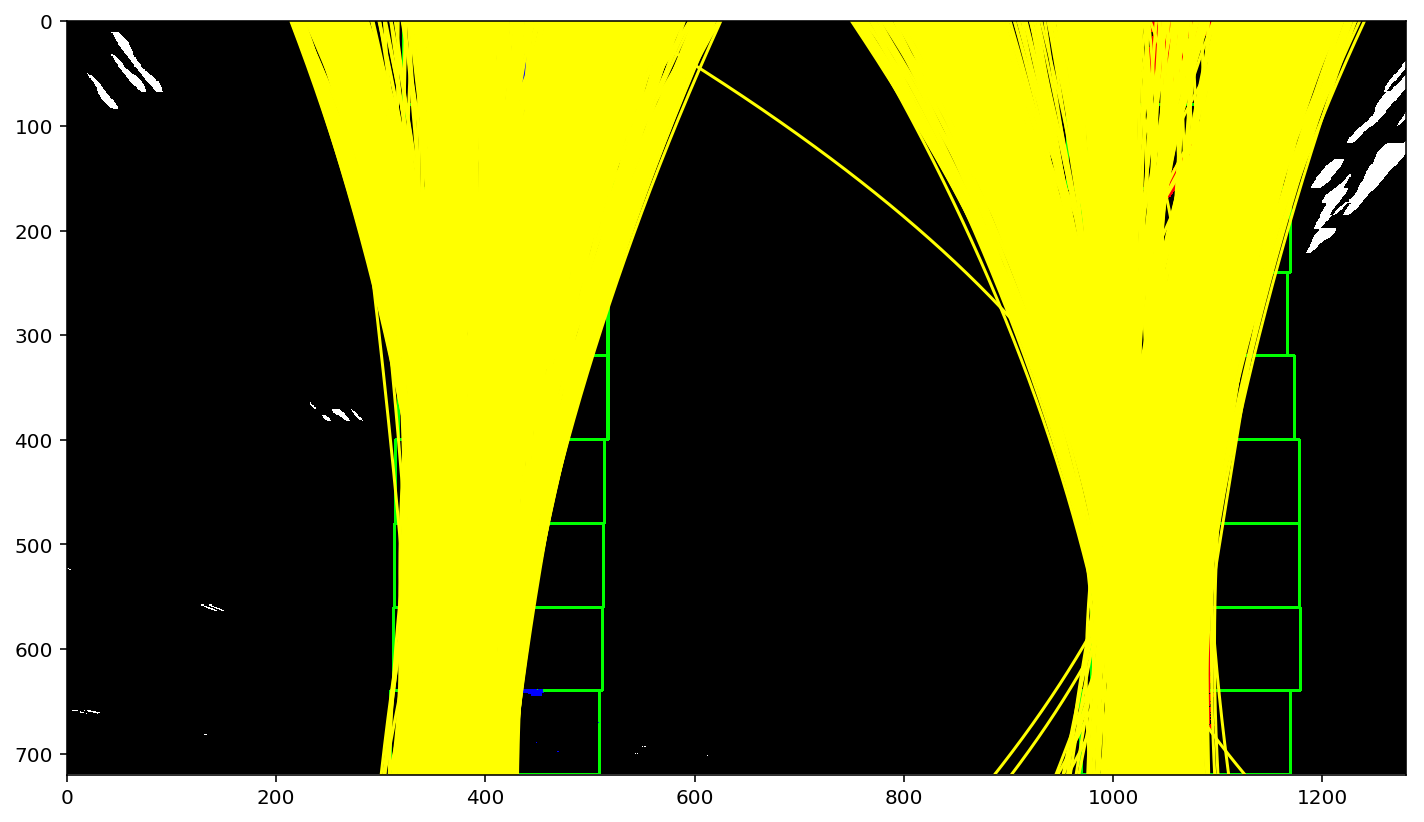

In [22]:
#Create video file pipeline
counter=0
output = 'out_test_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(22,25)
#clip1 = VideoFileClip("challenge_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

#clip1.save_frame("frame.jpeg")
#clip1 = clip1.fx(mve.vfx.rotate, lambda t: 90*t, expand=False)
out_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)
print(counter)